In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import os 

# from google.colab import drive
# drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#this is for the analysis on training data distribution 
#data = pd.read_feather("/content/gdrive/Shareddrives/D-Lab Fellows/D-Lab/Projects/Hate Speech 2017-20/Phase 2 2018-2020/Machine Learning/Deep Hate/data-raw/scaled-facets-continuous-rollout-v4.feather") 




In [17]:
#this is for the analysis on demographic background of raters 
data_multi = pd.read_feather('/home/rbarreto/data/scaled-facets-multi-50k-v4.feather')

#GET THE FILE PATH FROM THE DATA NAME, ADD A "/"

#os.getcwd() #do this whenever the data doesn't load
#os.chdir("../") this is to move up a directory

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#this won't work bc not loaded, but leaving it up to see what is 
data

,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,infitms,outfitms,identity,hypothesis
0,21556,twitter,1134110084978675712,Damn [SLUR] bitch get a hobby kind of fuck shi...,0.05,0.60,6,0.52,0.58,0.868539,0.192592
1,19190,reddit,ew8eh8e,Fuck off back to your Chapo shithole,0.23,0.62,4,0.45,0.44,0.880614,0.367588
2,3177,reddit,eppgjvg,"No, it means you're developing a black man dic...",0.37,0.42,4,1.40,1.10,0.857048,-0.536590
3,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.81,1.88,0.917681,-1.130178
4,173,reddit,enysnba,"I would love to use a double dildo with a bud,...",-2.98,0.37,5,2.35,1.09,0.919640,0.284625
...,...,...,...,...,...,...,...,...,...,...,...
41013,22986,twitter,1134939160471580672,Millions of #Yemen-is participated in mass ral...,-4.40,0.35,4,1.30,0.43,0.934007,-0.974684
41014,14785,reddit,evoy2wi,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,-0.20,0.41,4,1.40,1.84,0.931011,-0.265011
41015,34705,twitter,1156595841013964800,#DSSUpliftsTheThirdGender #EmancipationOfEunuc...,-2.89,0.46,4,0.53,0.32,0.830156,-1.087379
41016,30588,twitter,1152136813512802304,"Umar khalid, sahela rashid, kanhiyan kumar जैस...",-1.69,0.60,5,0.21,0.16,0.898928,-0.296437


In [6]:
data_multi.head(10)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,...,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,,1.0,30.4170074462890625,-84.18499755859375,0.907838,-1.186106
6,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,,7.0,40.6627044677734375,-73.9138031005859375,0.932548,-0.047389
7,4.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,,1.0,39.443603515625,-104.85359954833984375,0.933526,0.446312
8,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,,5.0,34.9250946044921875,-80.7277984619140625,0.891258,-0.199284
9,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,3.0,1.0,...,NaN,NaN,NaN,NaN,,1.0,32.246002197265625,-110.91770172119140625,0.893880,0.452932


In [18]:
#creating new data frame for identity variables
#renaming the columns to represent identity variables

# "target_identities_1\",  # Is the comment about race?\n",
#  "    \"target_identities_2\",  # Is the comment about religion?\n",
#   "    \"target_identities_3\",  # Is the comment about national origin?\n",
#   "    \"target_identities_4\",  # Is the comment about gender?\n",
#   "    \"target_identities_5\",  # Is the comment about sexual orientation?\n",
#   "    \"target_identities_6\",  # Is the comment about age?\n",
#   "    \"target_identities_7\",  # Is the comment about disability?\n"
#        \"target_identities_9\",  # Unsure, perhaps None of the above?\n",

#race 
#"target_race_1\",  # Black or African American\n",
#   "    \"target_race_2\",  # Hispanic or Latino\n",
#  "    \"target_race_3\",  # Asian\n",
# "    \"target_race_8\",  # Middle Eastern\n",
#    "    \"target_race_4\",  # Native American\n",
#   "    \"target_race_5\",  # Pacific Islander\n",
#  "    \"target_race_6\",  # White\n",
#   "    \"target_race_7\",  # Other race\n",
#  "    \"target_race_7_text\",  # If other, which?\n",

#target_religion_1\",  # Jews\n",
# "    \"target_religion_2\",  # Christians\n",
#    "    \"target_religion_4\",  # Buddhists\n",
#    "    \"target_religion_5\",  # Hindus\n",
#    "    \"target_religion_8\",  # Mormons\n",
#    "    \"target_religion_9\",  # Atheists\n",
#    "    \"target_religion_10\",  # Muslims\n",
#    "    \"target_religion_6\",  # Other religion\n",
#    "    \"target_religion_6_text\",  # If other, which?\n"

#  "    \"target_citizen_5\",  # Specific country\n",
#    "    \"target_citizen_1\",  # Immigrant\n",
#    "    \"target_citizen_2\",  # Migrant workers\n",
#    "    \"target_citizen_3\",  # Undocumented people\n",
#    "    \"target_citizen_4\",  # Other\n",
#    "    \"target_citizen_4_text\",  # If other, which?\n",
#

#  \"target_gender_1\",  # Men\n",
#    "    \"target_gender_3\",  # Women\n",
#    "    \"target_gender_2\",  # Non-binary\n",
#    "    \"target_gender_5\",  # Transgender women\n",
#    "    \"target_gender_6\",  # Transgender men\n",
#    "    \"target_gender_7\",  # Transgender unspecified\n",
#    "    \"target_gender_4\",  # Other\n",
#    "    \"target_gender_4_text\",  # If other, which?\n",

#  "    \"target_sexuality_1\",  # Bisexual\n",
#    "    \"target_sexuality_2\",  # Gay\n",
#    "    \"target_sexuality_6\",  # Lesbian\n",
#    "    \"target_sexuality_3\",  # Heterosexual\n",
#    "    \"target_sexuality_5\",  # Other\n",
#    "    \"target_sexuality_5_text\",  # If other, which?\n",

# "    \"target_age_1\",  # Children\n",
#    "    \"target_age_2\",  # Adolescents\n",
#    "    \"target_age_3\",  # adults\n",
#    "    \"target_age_4\",  # Middle-aged\n",
#    "    \"target_age_5\",  # Seniors\n",
#    "    \"target_age_6\",  # Other\n",
#    "    \"target_age_6_text\",  # If other, which?\n",

# "    \"target_disability_1\",  # People with physical disabilities\n",
#    "    \"target_disability_2\",  # People with cognitive disorders\n",
#    "    \"target_disability_3\",  # People with mental health problems\n",
#    "    \"target_disability_4\",  # Visually impaired people\n",
#    "    \"target_disability_5\",  # Hearing impaired people\n",
#    "    \"target_disability_9\",  # No specific disability\n",
#    "    \"target_disability_6\",  # Other\n",
#    "    \"target_disability_6_text\",  # If other, which?\n"

data_identity = data.rename(columns={'target_identities_1': 'race', 
                                 'target_identities_2': 'religion',
                                 'target_identities_3': 'national_origin',
                                 'target_identities_4': 'gender',
                                 'target_identities_5': 'sexual_orientation',
                                 'target_identities_6': 'age',
                                 'target_identities_7': 'disability',
                                 'target_identities_9': 'unsure',
                                 'target_race_1': 'black',
                                 'target_race_2': 'latinx',
                                 'target_race_3': 'asian',
                                 'target_race_8': 'middle_eastern',
                                 'target_race_4': 'native_american',
                                 'target_race_5': 'pacific_islander',
                                 'target_race_6': 'white',
                                 'target_race_7': 'other_race',
                                 'target_race_7_text': 'other_race_text',
                                 'target_religion_1': 'jews',
                                 'target_religion_2': 'christians',
                                 'target_religion_4': 'buddhists',
                                 'target_religion_5': 'hindus',
                                 'target_religion_8': 'mormons',
                                 'target_religion_9': 'atheists',
                                 'target_religion_10': 'muslims',
                                 'target_religion_6': 'other_religion',
                                 'target_religion_6_text': 'other_religion_text',
                                 'target_citizen_5': 'country',
                                 'target_citizen_1': 'immigrant',
                                 'target_citizen_2': 'migrant_worker',
                                 'target_citizen_3': 'undocumented',
                                 'target_citizen_4': 'other_nationality',
                                 'target_citizen_4_text': 'other_nationality_text',
                                 'target_gender_1': 'men',
                                 'target_gender_3': 'women',
                                 'target_gender_2': 'non-binary',
                                 'target_gender_5': 'transgender_women',
                                 'target_gender_6': 'transgender_men',
                                 'target_gender_7': 'transgender_unspecified',
                                 'target_gender_4': 'other_gender',
                                 'target_gender_4_text': 'other_gender_text',
                                 'target_sexuality_1': 'bisexual',
                                 'target_sexuality_2': 'gay',
                                 'target_sexuality_6': 'lesbian',
                                 'target_sexuality_3': 'heterosexual',
                                 'target_sexuality_5': 'other_sexuality',
                                 'target_sexuality_5_text': 'other_sexuality_text',
                                 'target_age_1': 'children',
                                 'target_age_2': 'adolescents',
                                 'target_age_3': 'adults',
                                 'target_age_4': 'middle-aged',
                                 'target_age_5': 'seniors',
                                 'target_age_6': 'other_age',
                                 'target_age_6_text': 'other_age_text',
                                 'target_disability_1': 'physical_disability',
                                 'target_disability_2': 'cognitive_disability', 
                                 'target_disability_3': 'mental_health',
                                 'target_disability_4': 'visually_impaired',
                                 'target_disability_5': 'hearing_impaired',
                                 'target_disability_9': 'not_specific',
                                 'target_disability_6': 'other_disability',
                                 'target_disability_6_text': 'other_disability_text'})
                                 #'demo_gender': 'gender', 
                                 #'demo_gender_text_4': 'gender text',
                                  #'demo_trans': 'trans',
                                  #'demo_educ': 'education', 
                                  #'demo_race_ethnicie_1': 'american indian alaska native',
                                  #'demo_race_ethnicitie_2': 'asian',
                                  #'demo_race_ethnicitie_3': 'alack',
                                  #'demo_race_ethnicitie_4': 'latino',
                                  #'demo_race_ethnicitie_5': 'native hawaiian pacific islander',
                                  #'demo_race_ethnicitie_8': 'middle eastern',
                                  #'demo_race_ethnicitie_6': 'white',
                                  #'demo_race_ethnicitie_7': 'other race',
                                  #'demo_race_ethnicitie_7_text': 'other text',
                                  #'demo_age': 'age',
                                  #'demo_income': 'income',
                                  #'demo_religion_1': 'atheist',
                                  #'demo_religion_2': 'buddhist',
                                  #'demo_religion_11': 'chrisitan', 
                                  #'demo_religion_4': 'hindu',
                                  #'demo_religion_5': 'jewish',
                                  #'demo_religion_7': 'mormon',
                                  #'demo_religion_8': 'muslim',
                                  #'demo_religion_9': 'nothing in particular',
                                  #'demo_religion_10': 'other religion',
                                  #'demo_religion_10_text': 'other religion text',
                                  #'demo_sexual_orien_1': 'straight',
                                  #'demo_sexual_orien_2': 'gay lesbian',
                                  #'demo_sexual_orien_3': 'bisexual', 
                                  #'demo_sexual_orien_4': 'other sexual orientation',
                                  #'demo_sexual_orien_5': 'prefer not to say',
                                  #'demo_sexual_orien_4_text': 'other sexual orientation text'})



In [ ]:
# #data_multi = data.rename(columns={'target_identities_1': 'race', 
#                                  'target_identities_2': 'religion',
                                #  'target_identities_3': 'national_origin',
                                #  'target_identities_4': 'gender',
                                #  'target_identities_5': 'sexual_orientation',
                                #  'target_identities_6': 'age',
                                #  'target_identities_7': 'disability',
                                #  'target_identities_9': 'unsure',
                                #  'target_race_1': 'black',
                                #  'target_race_2': 'latinx',
                                #  'target_race_3': 'asian',
                                #  'target_race_8': 'middle_eastern',
                                #  'target_race_4': 'native_american',
                                #  'target_race_5': 'pacific_islander',
                                #  'target_race_6': 'white',
                                #  'target_race_7': 'other_race',
                                #  'target_race_7_text': 'other_race_text',
                                #  'target_religion_1': 'jews',
                                #  'target_religion_2': 'christians',
                                #  'target_religion_4': 'buddhists',
                                #  'target_religion_5': 'hindus',
                                #  'target_religion_8': 'mormons',
                                #  'target_religion_9': 'atheists',
                                #  'target_religion_10': 'muslims',
                                #  'target_religion_6': 'other_religion',
                                #  'target_religion_6_text': 'other_religion_text',
                                #  'target_citizen_5': 'country',
                                #  'target_citizen_1': 'immigrant',
                                #  'target_citizen_2': 'migrant_worker',
                                #  'target_citizen_3': 'undocumented',
                                #  'target_citizen_4': 'other_nationality',
                                #  'target_citizen_4_text': 'other_nationality_text',
                                #  'target_gender_1': 'men',
                                #  'target_gender_3': 'women',
                                #  'target_gender_2': 'non-binary',
                                #  'target_gender_5': 'transgender_women',
                                #  'target_gender_6': 'transgender_men',
                                #  'target_gender_7': 'transgender_unspecified',
                                #  'target_gender_4': 'other_gender',
                                #  'target_gender_4_text': 'other_gender_text',
                                #  'target_sexuality_1': 'bisexual',
                                #  'target_sexuality_2': 'gay',
                                #  'target_sexuality_6': 'lesbian',
                                #  'target_sexuality_3': 'heterosexual',
                                #  'target_sexuality_5': 'other_sexuality',
                                #  'target_sexuality_5_text': 'other_sexuality_text',
                                #  'target_age_1': 'children',
                                #  'target_age_2': 'adolescents',
                                #  'target_age_3': 'adults',
                                #  'target_age_4': 'middle-aged',
                                #  'target_age_5': 'seniors',
                                #  'target_age_6': 'other_age',
                                #  'target_age_6_text': 'other_age_text',
                                #  'target_disability_1': 'physical_disability',
                                #  'target_disability_2': 'cognitive_disability', 
                                #  'target_disability_3': 'mental_health',
                                #  'target_disability_4': 'visually_impaired',
                                #  'target_disability_5': 'hearing_impaired',
                                #  'target_disability_9': 'not_specific',
                                #  'target_disability_6': 'other_disability',
                                #  'target_disability_6_text': 'other_disability_text',
                                #   'demo_gender': 'gender', 
                                #   'demo_gender_text_4': 'gender text',
                                #   'demo_trans': 'trans',
                                #   'demo_educ': 'education', 
                                #   'demo_race_ethnicie_1': 'american indian alaska native',
                                #   'demo_race_ethnicitie_2': 'asian',
                                #   'demo_race_ethnicitie_3': 'alack',
                                #   'demo_race_ethnicitie_4': 'latino',
                                #   'demo_race_ethnicitie_5': 'native hawaiian pacific islander',
                                #   'demo_race_ethnicitie_8': 'middle eastern',
                                #   'demo_race_ethnicitie_6': 'white',
                                #   'demo_race_ethnicitie_7': 'other race',
                                #   'demo_race_ethnicitie_7_text': 'other text',
                                #   'demo_age': 'age',
                                #   'demo_income': 'income',
                                #   'demo_religion_1': 'atheist',
                                #   'demo_religion_2': 'buddhist',
                                #   'demo_religion_11': 'chrisitan', 
                                #   'demo_religion_4': 'hindu',
                                #   'demo_religion_5': 'jewish',
                                #   'demo_religion_7': 'mormon',
                                #   'demo_religion_8': 'muslim',
                                #   'demo_religion_9': 'nothing in particular',
                                #   'demo_religion_10': 'other religion',
                                #   'demo_religion_10_text': 'other religion text',
                                #   'demo_sexual_orien_1': 'straight',
                                #   'demo_sexual_orien_2': 'gay lesbian',
                                #   'demo_sexual_orien_3': 'bisexual', 
                                #   'demo_sexual_orien_4': 'other sexual orientation',
                                #   'demo_sexual_orien_5': 'prefer not to say',
                                #   'demo_sexual_orien_4_text': 'other sexual orientation text'})

In [8]:
#number of columns
len(data_identity.columns)

135

In [9]:
data_identity.dtypes

sentiment            float64
respect              float64
insult               float64
humiliate            float64
status               float64
                      ...   
demo_ideology        float64
locationlatitude      object
locationlongitude     object
identity             float64
hypothesis           float64
Length: 135, dtype: object

![alt text](https://drive.google.com/uc?export=view&id=1J8oMVbf1YFKDPo-Cy0PxXa8uINwvwDjr)


In [11]:
# turn NaN values into 0
data_identity['platform'] = data_identity.platform.astype(str)

data_identity.fillna(0, inplace=True)


In [12]:
data_identity['platform']

0         youtube
1         twitter
2         youtube
3         youtube
4          reddit
           ...   
135551    twitter
135552    twitter
135553    twitter
135554    twitter
135555     reddit
Name: platform, Length: 135556, dtype: object

In [13]:
data_identity.head(1)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,...,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178


In [14]:
#data_identity['race'] = data_identity.race.astype(str)
#data_identity.fillna(0, inplace=True)


#this asks - is this comment about race? in the survey
#are the NaNs people who did not select race?


data_identity['race'] = data_identity['race'].fillna(0)
data_identity['race']

np.unique(data_identity['race'], return_counts=True)


(array([0., 1.]), array([87197, 48359]))

In [ ]:
# Count the number of race, disability, etc in each column 
#just use .value_counts()

data_identity['race'].sum() #this is when race is present in the comment, so set to 1
#data_identity['race']

#.sum() == 0 

In [ ]:
data_identity['race'].count() #this is total comments...of people who 
#both did not and did select race?

In [52]:
data_identity['religion'].sum() 

26188.0

In [66]:
data_identity['national_origin'].sum()

24378.0

In [67]:
data_identity['gender'].sum()

40440.0

In [68]:
data_identity['sexual_orientation'].sum()

22413.0

In [69]:
data_identity['age'].sum()

2005.0

In [70]:
data_identity['disability'].sum()

3716.0

In [71]:
#created a variable with the columns of interest
#The outer bracket means subset, the inner bracket is a list
#So together it’s like “subset according to this list”
selected_attributes = data_identity[['race', 'religion', 'national_origin', 'gender', 'sexual_orientation', 'age', 'disability', 'unsure']]

In [72]:
round(8493/37857, 2)

0.22

In [74]:
#loop and sum each value and total value in selected attributes
total_identity = 0
for col in selected_attributes:
    print(col, selected_attributes[col].sum(), '% is', (((round(selected_attributes[col].sum()/37857, 2) * 100))))
    total_identity += selected_attributes[col].sum()

print('total is', total_identity)




race 48359.0 % is 128.0
religion 26188.0 % is 69.0
national_origin 24378.0 % is 64.0
gender 40440.0 % is 107.0
sexual_orientation 22413.0 % is 59.0
age 2005.0 % is 5.0
disability 3716.0 % is 10.0
unsure 6284.0 % is 17.0
total is 173783.0


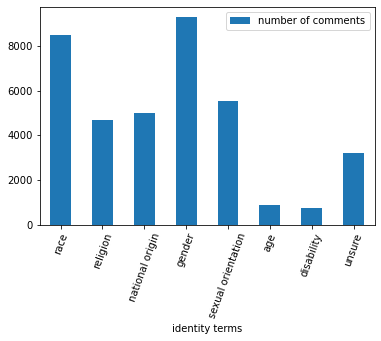

In [75]:
#plot for identity types ABSOLUTE VALUES
df = pd.DataFrame({'identity terms':['race', 'religion', 'national origin', 
                                     'gender', 'sexual orientation', 
                                     'age', 'disability', 'unsure'], 'number of comments':[8493, 4711, 4997, 9286, 5531, 877, 764, 3198]})
ax = df.plot.bar(x='identity terms', y='number of comments', rot=70)

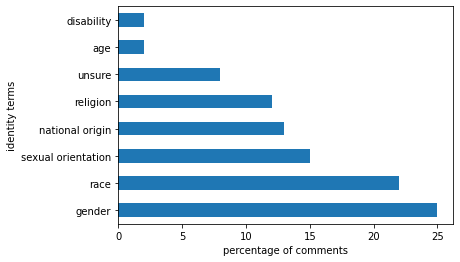

In [89]:
#PERCENTAGE VALUES FOR IDENTITY

df = pd.DataFrame({'identity terms':['race', 'religion', 'national origin', 
                                     'gender', 'sexual orientation', 
                                     'age', 'disability', 'unsure'], 'percentage of comments':[22, 12, 13, 25, 15, 2, 2, 8]})
df_sorted = df.sort_values('percentage of comments', ascending=False)
ax = df_sorted.plot.barh(x='identity terms', y='percentage of comments')
ax.set_xlabel('percentage of comments')
ax.get_legend().remove();

In [97]:
def label_race(row):
    if (row['demo_race_ethnicitie_1'] + row['demo_race_ethnicitie_2'] + 
    row['demo_race_ethnicitie_3'] + row['demo_race_ethnicitie_4'] + 
    row['demo_race_ethnicitie_5'] + row['demo_race_ethnicitie_6'] + 
    row['demo_race_ethnicitie_7'] + row['demo_race_ethnicitie_8'] > 1):
        return 'two or more races'
    if row['demo_race_ethnicitie_1'] == 1:
        return 'american indian alaska native'
    if row['demo_race_ethnicitie_2'] == 1:
        return 'asian'
    if row['demo_race_ethnicitie_3'] == 1:
        return 'black'
    if row['demo_race_ethnicitie_4'] == 1:
        return 'latino'
    if row['demo_race_ethnicitie_5'] == 1:
        return 'native hawaiian pacific islander'
    if row['demo_race_ethnicitie_6'] == 1:
        return 'white'
    if row['demo_race_ethnicitie_7'] == 1:
        return 'other race'
    if row['demo_race_ethnicitie_8'] == 1:
        return 'middle eastern'
    return 'unknown'

In [99]:
data_multi['race_label'] = data_multi.replace(np.nan, 0).apply(label_race, axis=1) #axis =1 means application is done at row rather than column lelvel

In [101]:
data_multi['race_label'].value_counts(normalize=True)

white                               0.738108
black                               0.079310
two or more races                   0.077296
asian                               0.054391
latino                              0.038434
other race                          0.006617
american indian alaska native       0.002958
middle eastern                      0.001586
native hawaiian pacific islander    0.000878
unknown                             0.000420
Name: race_label, dtype: float64

In [109]:
def target_race(row):
    if (row['target_race_1'] + row['target_race_2'] + 
    row['target_race_3'] + row['target_race_4'] + 
    row['target_race_5'] + row['target_race_6'] + 
    row['target_race_7'] > 1):
        return 'two or more races'
    if row['target_race_1'] == 1:
           return 'black'
    if row['target_race_2'] == 1:
        return 'latino'
    if row['target_race_3'] == 1:
        return 'asian'
    if row['target_race_4'] == 1:
        return 'native american'
    if row['target_race_5'] == 1:
        return 'pacific islander'
    if row['target_race_6'] == 1:
        return 'white'
    if row['target_race_7'] == 1:
        return 'other race'
    return 'no race target'

In [110]:
data_multi['target_race'] = data_multi.replace(np.nan, 0).apply(target_race, axis=1)

In [111]:
data_multi['target_race'].value_counts(normalize=True)

no race target       0.680036
black                0.128323
two or more races    0.050761
white                0.048592
latino               0.030002
asian                0.029294
other race           0.027487
native american      0.004802
pacific islander     0.000701
Name: target_race, dtype: float64

<AxesSubplot:xlabel='target_race'>

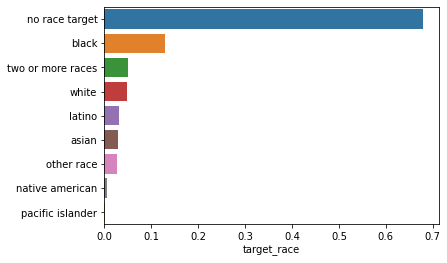

In [112]:
sns.barplot(y=data_multi['target_race'].value_counts(normalize=True).index, x = data_multi['target_race'].value_counts(normalize=True), orient='h')

In [93]:
#variable that includes columns for race 

race_attributes = data_identity[['black', 'latinx', 'asian', 'middle_eastern', 
                                'pacific_islander', 'white', 'other_race']]

In [96]:
data_identity['black'].sum()
#black is target_black
#so there are that many columns targeting black folks 

22899.0

In [94]:
#loop and sum 
total_race = 0

for col in race_attributes:
    print(col, race_attributes[col].sum(), '% is', (((round(race_attributes[col].sum()/11251, 2) *100))))
  
    total_race += race_attributes[col].sum()

print('total is', total_race) 


black 22899.0 % is 204.0
latinx 8497.0 % is 76.0
asian 7025.0 % is 62.0
middle_eastern 9450.0 % is 84.0
pacific_islander 2358.0 % is 21.0
white 9797.0 % is 87.0
other_race 4780.0 % is 42.0
total is 64806.0


In [ ]:
#plot for race ABSOLUTE
df = pd.DataFrame({'race':['black', 'latinx', 'asian', 
                                     'middle_eastern', 'pacific_islander', 
                                     'white', 'other_race'], 'number of comments':[3672, 1281, 1075, 1621, 415, 2244, 943]})
ax = df.plot.bar(x='race', y='number of comments', rot=70)

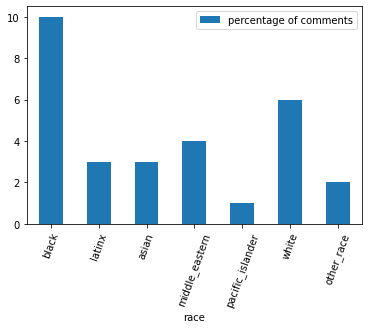

In [90]:
#plot for race PERCENTAGE
df = pd.DataFrame({'race':['black', 'latinx', 'asian', 
                                     'middle_eastern', 'pacific_islander', 
                                     'white', 'other_race'], 'percentage of comments':[10, 3, 3, 4, 1, 6, 2]})
ax = df.plot.bar(x='race', y='percentage of comments', rot=70)

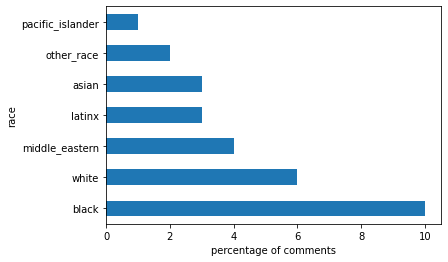

In [91]:
df = pd.DataFrame({'race':['black', 'latinx', 'asian', 
                                     'middle_eastern', 'pacific_islander', 
                                     'white', 'other_race'], 'percentage of comments':[10, 3, 3, 4, 1, 6, 2]})
df_sorted = df.sort_values('percentage of comments', ascending=False)
ax = df_sorted.plot.barh(x='race', y='percentage of comments')
ax.set_xlabel('percentage of comments')
ax.get_legend().remove();

In [ ]:
#variable that includes columns for religion

religion_attributes = data_identity[['jews', 'christians', 'buddhists', 
                                   'hindus', 'mormons', 'atheists',
                                   'muslims', 'other_religion']]

In [ ]:
#loop and sum
total_religion = 0
for col in religion_attributes:

  print(col, religion_attributes[col].sum(), '% is', (((round(religion_attributes[col].sum()/6473, 2)*100))))
  total_religion += religion_attributes[col].sum()

print('total religion is', total_religion)

In [ ]:
df = pd.DataFrame({'religious identity':['jewish', 'christian', 'buddhist', 
                                     'hindu', 'mormon', 
                                     'atheist', 'muslim', 'other religion'], 'number of comments':[1031, 1605, 256, 436, 285, 341, 1920, 599]})
ax = df.plot.bar(x='religious identity', y='number of comments', rot=70)

In [ ]:
df = pd.DataFrame({'religious identity':['jewish', 'christian', 'buddhist', 
                                     'hindu', 'mormon', 
                                     'atheist', 'muslim', 'other religion'], 'percentage of comments':[16, 25, 4, 7, 4, 5, 30, 9]})
ax = df.plot.bar(x='religious identity', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for national origin 

national_origin_attributes = data_identity[['country', 'immigrant', 'migrant_worker',
                                            'undocumented', 'other_nationality']]

In [ ]:
#sum and loop
total_national_origin = 0
for col in national_origin_attributes:
  print(col, national_origin_attributes[col].sum(), '% is', (((round(national_origin_attributes[col].sum()/6693, 2)*100))))
  total_national_origin += national_origin_attributes[col].sum()
print('total national origin', total_national_origin)

In [ ]:
df = pd.DataFrame({'citizenship status':['country', 'immigrant', 'migrant worker', 
                                     'undocumented person', 'other nationality'], 
                   'number of comments':[3091, 1545, 493, 1043, 521]})
ax = df.plot.bar(x='citizenship status', y='number of comments', rot=70)

In [ ]:
df = pd.DataFrame({'citizenship status':['country', 'immigrant', 'migrant worker', 
                                     'undocumented person', 'other nationality'], 
                   'percentage of comments':[46, 23, 7, 16, 8]})
ax = df.plot.bar(x='citizenship status', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for gender 

gender_attributes = data_identity[['men', 'women', 'non-binary', 
                                   'transgender_women', 'transgender_men', 
                                   'transgender_unspecified', 'other_gender']]


In [ ]:
#loop and sum
total_gender = 0

for col in gender_attributes:
  print(col, gender_attributes[col].sum(), '% is', (((round(gender_attributes[col].sum()/12041, 2)*100))))
  total_gender += gender_attributes[col].sum()
print('total gender', total_gender)

In [ ]:
df = pd.DataFrame({'gender':['men', 'women', 'non-binary', 
                                     'transgender women', 'transgender men', 
                                     'transgender', 'other'], 'number of comments':[2820, 6592, 479, 596, 744, 660, 150]})
ax = df.plot.bar(x='gender', y='number of comments', rot=70)

In [ ]:
df = pd.DataFrame({'gender':['men', 'women', 'non-binary', 
                                     'transgender women', 'transgender men', 
                                     'transgender', 'other'], 'percentage of comments':[23, 55, 4, 5, 6, 5, 1]})
ax = df.plot.bar(x='gender', y='percentage of comments', rot=70)

In [ ]:
print(data_identity.columns.values)


In [ ]:
#variable that includes columns for sexual orientation 

sexual_orientation_attributes = data_identity[['bisexual', 'gay', 'lesbian',
                                               'heterosexual', 'other_sexuality']]

In [ ]:
#loop and sum 

total_sexual_orientation = 0

for col in sexual_orientation_attributes:
  
  print(col, sexual_orientation_attributes[col].sum(), '% is', (((round(sexual_orientation_attributes[col].sum()/8998, 2)*100))))
  total_sexual_orientation += sexual_orientation_attributes[col].sum()

print('total sexual orientation', total_sexual_orientation)



# total_gender = 0

# for col in gender_attributes:
#   print(col, gender_attributes[col].sum(), '% is', (((round(gender_attributes[col].sum()/12041, 2)*100))))
#   total_gender += gender_attributes[col].sum()
# print('total gender', total_gender)

In [ ]:
df = pd.DataFrame({'sexual orientation':['bisexual', 'gay', 'lesbian', 
                                     'heterosexual', 'other sexuality'], 
                   'percentage of comments':[18, 41, 15, 19, 6]})
ax = df.plot.bar(x='sexual orientation', y='percentage of comments', rot=70)

In [ ]:
df = pd.DataFrame({'sexual orientation':['bisexual', 'gay', 'lesbian', 
                                     'heterosexual', 'other sexuality'], 
                   'percentage of comments':[1650, 3690, 1378, 1745, 535]})
ax = df.plot.bar(x='sexual orientation', y='number of comments', rot=70)

In [ ]:
#variable that includes columns for age

age_attributes = data_identity[['children', 'adolescents', 'adults', 
                                'middle-aged', 'seniors', 'other_age']]

In [ ]:
#loop and sum 
total_age = 0 
for col in age_attributes:
  print(col, age_attributes[col].sum(), '% is', (((round(age_attributes[col].sum()/1495, 2)*100))))
  total_age += age_attributes[col].sum()
print('total age is', total_age)

In [ ]:
df = pd.DataFrame({'age': ['children', 'adolescents', 'adults', 
                                     'middle aged', 'seniors', 'other age'], 
                   'percentage of comments':[15, 19, 32, 18, 13, 2]})

ax = df.plot.bar(x='age', y='percentage of comments', rot=70)

In [ ]:
df = pd.DataFrame({'age': ['children', 'adolescents', 'adults', 
                                     'middle aged', 'seniors', 'other age'], 
                   'number of comments':[227, 280, 485, 272, 196, 35]})

ax = df.plot.bar(x='age', y='number of comments', rot=70)

In [ ]:
#variable that includes columns for disability 

disability_attributes = data_identity[['physical_disability', 'cognitive_disability', 'mental_health',
                          'visually_impaired', 'hearing_impaired', 'not_specific', 
                          'other_disability']]

In [ ]:
#loop and sum
total_disability = 0
for col in disability_attributes:

  total_disability += disability_attributes[col].sum()
  print(col, disability_attributes[col].sum(), '% is', (((round(disability_attributes[col].sum()/1079, 2)*100))))

print('total disability', total_disability)

In [ ]:
df = pd.DataFrame({'disability':['physical disability', 'cognitive disability', 'mental health', 
                                     'visually impaired', 'hearing impaired', 
                                     'not specific disability', 'other disability'], 
                   'percentage of comments':[10, 37, 18, 7, 7, 16, 5]})
ax = df.plot.bar(x='disability', y='percentage of comments', rot=70)

In [ ]:
df = pd.DataFrame({'disability':['physical disability', 'cognitive disability', 'mental health', 
                                     'visually impaired', 'hearing impaired', 
                                     'not specific disability', 'other disability'], 
                   'number of comments':[112, 399, 194, 74, 73, 176, 51]})
ax = df.plot.bar(x='disability', y='number of comments', rot=70)

In [ ]:
#attack_type_attribute = data_identity[['respect', 'insult', 'humiliate', 
                          #'status', 'dehumanize', 'violence_phys',
                          #'genocide', 'attack_defend', 'hatespeech']]

In [ ]:
#cut identity columns by platform
#ie perhaps there's certain type of HS on these platforms that are different


In [ ]:
## Ask Geoff - what does the unsure q_39 mean?
## Ask Geoff - what does demo_race_ethnicitie_1-7 mean? likewise with religion etc

In [ ]:
#these are absolute values, do percentages instead [done]

#stacked barplot by each different label (hate speech, dehumanizing, etc)
#filter by comments that are actuall hate speech 
#there are 4 reviewers per comment, figureo ut how to visualize that

#look into the other column - disability specifically seems to have something related to 
#fat people + HIV-positive people 

# **Filtering the Data by Comment Category: Hate Speech, Dehumanizing Speeech, etc**

***Appendix A
A.1 Scale items from labeling instrument***

***Table A1. Scale items from labeling instrument. These items operationalize our hate speech construct and are aggregated
into a continuous score via Rasch measurement theory.***


Item name / Prompt/ Response options

***Identities*** a 
Is the comment above directed at or about any individual or
groups based on: (multiple selections allowed)

Race or ethnicity, religion, national ori-
gin or citizenship status, gender, sex-
ual orientation, age, disability status, or
none of the above

1. ***Sentiment*** How would you describe the sentiment of this comment? Strongly negative, somewhat negative,
neutral, somewhat positive, strongly
positive
2. ***Respect*** Is this comment respectful towards the group(s) you previously
identified?
Strongly disrespectful, disrespectful,
neutral, respectful, strongly respectful
3. ***Insult*** Do you agree or disagree with the following statement: This com-
ment is insulting towards the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
4. ***Humiliate*** Do you agree or disagree with the following statement: This com-
ment is humiliating towards the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
5. ***Status*** This comment states that the group(s) you previously identified
is:
Strongly inferior, inferior, neither supe-
rior nor inferior, superior, strongly su-
perior
6. ***Dehumanize*** Do you agree or disagree with the following statement: This com-
ment dehumanizes the group(s) you previously identified (e.g., by
comparing them to an animal).
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
7. ***Violence*** Do you agree or disagree with the following statement: This com-
ment calls for using violence against the group(s) you previously
identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
8. ***Genocide*** Do you agree or disagree with the following statement: This com-
ment calls for the deliberate killing of a large group of people from
the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
9. ***Attack-Defend*** Is the comment attacking or defending the group(s) you previously
identified?
Strongly defending, defending, nei-
ther defending nor attacking, attacking,
strongly attacking
10. ***Hate speech***
(binary)
Does this comment contain hate speech, defined as “bias-motivated,
hostile and malicious language targeted at a person/group because of
their actual or perceived innate characteristics, especially when the
group is unnecessarily labeled (e.g., ”jew bankers”, ’n hooligans’).” The
comment contains hate speech if slurs or derogatory language are used
toward any person or group regardless of whether or not the target is
a member of the slur-target group. (e.g. a comment calling Trump a
faggot or a n***** still contains hate speech).
Yes, no, unclear
aThis item is converted to a binary value of 0 if no identities are present and 1 if any identities are present. It is not directly used in the scale but if
a comment is not flagged as having at least one identity group target then the remaining scale items are skipped in our labeling instrument.






In [ ]:
#one of the things that sticks out to me is that we're saying we're predicting hate speech
#but at the same time hate speech is a variable in there, at the same level as dehumanization for example


In [ ]:
data_multi.head(5)

In [ ]:
sort_by_sentiment = data_multi.sort_values('sentiment', ascending =False)

In [ ]:
#sort_by_sentiment.head(10)

In [ ]:
#sort_by_sentiment.tail(10)

so chris said that looking at the raw scale items wouldn't be as useful bc we have a threshold that we set through the reference commments in order to adequately interpret those absolute numbers

scores are 0-4 (not very x, not x, neutral, x, very x)


In [ ]:
sort_by_respect = data_multi.sort_values('respect', ascending=False)

In [ ]:
sort_by_respect.head(10)

In [ ]:
#what do i want to look at here? the distribution of scores across comments, in other
#words how many of these comments are labeled as 4 or 3 or 2 etc?

In [ ]:
#comment_data = data_multi['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech', 'comment_id']
comment_data = data_multi.iloc[:, 0:10]
#comment_data.to_csv('comment_data.csv')



In [ ]:
comment_data['sentiment'].value_counts()

In [ ]:
sentiment = comment_data['sentiment']

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.countplot(x='sentiment', data=comment_data)
labels = ['strongly positive', 'somewhat positive', 'neutral', 'somewhat negative', 'strongly negative']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Sentiment')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


#plt.xticks(sentiment, ('strongly positive', 'somewhat positive', 'neutral', 
           #'somewhat negative', 'strongly negative'))

In [ ]:
genocide = comment_data['genocide'] #you don't have to do this step, you can just do step 2 
comment_data['genocide'].value_counts()
#genocide.value_counts()

In [ ]:

sns.set(style='whitegrid')
ax = sns.countplot(x='genocide', data=comment_data)

labels = ['disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Genocide')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
#forloop
#hue in seaborn for cluster barplots

how many comments were labeled as [insert term here] ? 
out of those comments labeled, how many of them had to do with [insert identity here]

so above is a question of quantity, next we want to look at a question of degree 
(in which you'll have to look at degree)
also it's 4 raters per comment right, so where can we see that? this dataset just shows us one raters decision
you also have to rename the target identities 1-7 etc to correspond to race, gender, etc for this dataset

In [ ]:
data_multi.head(5)


In [ ]:
data_multi.sort_values('comment_id', ascending=False)

In [ ]:
#let's do a group by here
 #df.groupby("state")["last_name"].count()

group_by_comment_id = data_multi.groupby("comment_id").count().reset_index()
group_by_comment_id.sort_values('comment_id', ascending=False)

#group_by_comment_id.head(5)

#we think that what we're looking at in the columns is actually just the number of raters
#so it's not necessarily 4 raters per comment
#one question to ask here then would be how many raters were assigned to each comment?



In [ ]:
comment_data['respect'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='respect', data=comment_data)

labels = ['Very respectful', 'somewhat respectful', 'neither disrespectful nor respectful', 'somewhat disrespectful', 'very disrespectful']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Respect')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


In [ ]:
comment_data['insult'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='insult', data=comment_data)

labels = ['somewhat disagree', 'disagree', 'neither agree nor disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Insult')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 




In [ ]:
comment_data['humiliate'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='humiliate', data=comment_data)

labels = ['somewhat disagree', 'neither agree nor disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Humiliate')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 



In [ ]:
comment_data['status'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='status', data=comment_data)

labels = ['Inferior', 'Superior']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Status')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['dehumanize'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='dehumanize', data=comment_data)

labels = ['Disagree', 'Agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Dehumanization')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['violence_phys'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='violence_phys', data=comment_data)

labels = ['Disagree', 'Agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Physical Violence')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['attack_defend'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='attack_defend', data=comment_data)

labels = ['strongly defending', 'defending', 'neither defending nor attacking', 'attacking']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Attack or Defend')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


In [ ]:
comment_data['hatespeech'].value_counts()

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='hatespeech', data=comment_data)


labels = ['no', 'yes']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Hate Speech')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


so what we have above is the distribution of degrees for the different dimensions, ie humiliate, sentiment, status, etc - some of them are binary (0,1) by definition the others are categorical (0-4) 

the other questions i'll want to ask here relate to the demographic background of the raters themselves - and how that may correlate with particular interpretations of the text (does this count as racism? and if so, how severe it is, for example)

# **NEW SECTION: RATERS DEMOGRAPHIC BACKGROUND**

In [ ]:
#cluster the demographic groups, so if race = black, race = white, race = latinx (on the x axis) how much content did they identify
#as problematic towards black people? or POC generally?

#this might be hard to quantify bc you have random chance intervening, how many labelers were given content relating to 
#types of hate speech against POC, etc? and since they're creating ground truth, you couldn't do a ratio of 
#number of identified as hate speech against POC [yes / no] / actually hate speech against POC confirmed

#could we do some analysis to determine if the differences are statistically significant intstead of just plotting the data viz?
#like maybe some t-tests or something like that

#another way to get to this, would be to look at the 3-4 reviewers per post and see variation in the lablers for those posts,
#so it's kinda like holding constant for being assigned to a particular post that may or may not have hate speech against a 
#given group 


 "demo_gender",  # Annotator's gender
    "demo_gender_4_text",
    "demo_trans",  # Does the annotator identity as transgender?
    "demo_educ",  # Annotator's education
    "demo_race_ethnicitie_1",  # Annotator's ethnicity
    "demo_race_ethnicitie_2",
    "demo_race_ethnicitie_3",
    "demo_race_ethnicitie_4",
    "demo_race_ethnicitie_5",
    "demo_race_ethnicitie_8",
    "demo_race_ethnicitie_6",
    "demo_race_ethnicitie_7",
    "demo_race_ethnicitie_7_text",
    "demo_age",  # Annotator's age
    "demo_income",  # Annotator's income
    "demo_religion_1",  # Annotator's religion
    "demo_religion_2",
    "demo_religion_11",
    "demo_religion_4",
    "demo_religion_5",
    "demo_religion_7",
    "demo_religion_8",
    "demo_religion_9",
    "demo_religion_10",
    "demo_religion_10_text",
    "demo_sexual_orien_1",  # Annotator's sexual orientation
    "demo_sexual_orien_2",
    "demo_sexual_orien_3",
    "demo_sexual_orien_4",
    "demo_sexual_orien_5",
    "demo_sexual_orien_4_text",
    "demo_ideology",  # Annotator's ideology

In [ ]:
 #renaming the variables so they make sense 
 #data_demo = datamulti(columns={'demo_gender': 'race', 

In [ ]:
data_multi[['labeler_id','demo_gender']]

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_gender'])['demo_gender'].value_counts()
 #['demo_gender']
 #.reset_index()

In [ ]:
#data_multi['demo_gender']
#print(data_multi)

#Female(1), Male(2), Nonbinary or third gender (3), Prefer not to say (5), 
#refer to self describe (4)
#np.unique(data_multi['demo_gender'], return_counts=True)
data_multi['demo_gender'].value_counts()


#data_multi['demo_gender'].isnull().sum() 
#answer = 0
#this makes sense bc people who opt-ed out of this question chose number 4

#check for NaN values here to see if they need to be filled
#df['your column name'].isnull().sum()
 


#how to fill nan values with 0s or wahtever is appropriate 

#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
#df.fillna(0)

In [ ]:
df_gender = pd.DataFrame({'gender':['female', 'male', 'non-binary', 
                                     'declined', 'self desc'], 
                   'number of raters':[4426, 3392, 59, 28, 6]})

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='gender', y ='number of raters', data=df_gender)
#we can't see 3,4, 5 in this graph even though we know they're significant
#rename x axis and y axis

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_gender_4_text'])['demo_gender_4_text'].value_counts()

In [ ]:
#data_multi['demo_gender_4_text']
np.unique(data_multi['demo_gender_4_text'], return_counts=True)
data_multi['demo_gender_4_text'].value_counts() 
#133437 are all unique responses

#np.unique gives me the unique instances 
#return_counts=True gives me the number each instance shows up; default false

In [ ]:
np.unique(data_multi['demo_gender_4_text'])

In [ ]:
data_multi['demo_gender_4_text']

In [ ]:

#np.unique(data_multi['demo_trans'], return_counts=True)

#data_multi['demo_trans'].isnull().sum() 
#the answer to this is 0 here as well

data_multi['demo_trans'].value_counts()

#need to get rid of the nans by basically just turning them into 0s
#so they can be aggregated out np.unique(data_multi['demo_trans'], return_counts=True)

#trans (1), not trans (2), prefer not to say (4)

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_trans'])['demo_trans'].value_counts()

In [ ]:
df_trans = pd.DataFrame({'trans':['yes', 'no', 'declined'], 
                   'number of raters':[67, 7806, 39]})

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='trans', y='number of raters', data=df_trans)
#maybe use a stacked bar chart here?

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_educ'])['demo_educ'].value_counts()

In [ ]:
#np.unique(data_multi['demo_educ'], return_counts=True)
data_multi['demo_educ'].value_counts()
#some high school (1)
#high school graduate (2)
#some college (3)
#college graduate (AA /AS ) (5)
#college graduate (BA / BS) (6)
#masteers degree (MA / MS) (7)
#professional degree (JD / MBA) (8)
#doctoral degree (PhD)

In [ ]:
df_educ = pd.DataFrame({'edu level':['high school', 'high school grad', 'college', 
                                     'AA grad', 'BA grad', 'masters', 'professional', 'doctoral'], 
                   'number of raters':[49, 859, 2064, 1041, 2913, 729, 176, 89]})

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='edu level', y='number of raters', data=df_educ)

for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_1'], return_counts=True)
#see if there are any NaNs here

#data_multi['demo_race_ethnicitie_1'].isnull().sum()
data_multi['demo_race_ethnicitie_1'].value_counts()
#american indian or alaska native

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_1'])['demo_race_ethnicitie_1'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_2'], return_counts=True)
data_multi['demo_race_ethnicitie_2'].value_counts()
#asian

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_2'])['demo_race_ethnicitie_2'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_3'], return_counts=True)
data_multi['demo_race_ethnicitie_3'].value_counts()
#black or african american

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_3'])['demo_race_ethnicitie_3'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_4'], return_counts=True)
data_multi['demo_race_ethnicitie_4'].value_counts()
#hispanic or latino

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_4'])['demo_race_ethnicitie_4'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_5'], return_counts=True)

data_multi['demo_race_ethnicitie_5'].value_counts()
#native hawaiian / pacific islander

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_5'])['demo_race_ethnicitie_5'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_6'], return_counts=True)
data_multi['demo_race_ethnicitie_6'].value_counts()
#white

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_6'])['demo_race_ethnicitie_6'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_7'], return_counts=True)
#these are just the number of people that wrote 'other' 
#these are the number of people who identified with other

data_multi['demo_race_ethnicitie_7'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_7'])['demo_race_ethnicitie_7'].value_counts()

In [ ]:
np.unique(data_multi['demo_race_ethnicitie_7_text'], return_counts=False)
#these are the number of people that responded with 'other' 
#and what they wrote in the fill in the blank 
#the majority were empty ''

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_7_text'])['demo_race_ethnicitie_7_text'].value_counts()

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_8'], return_counts=True)
data_multi['demo_race_ethnicitie_8'].value_counts()
#middle eastern

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_8'])['demo_race_ethnicitie_8'].value_counts()

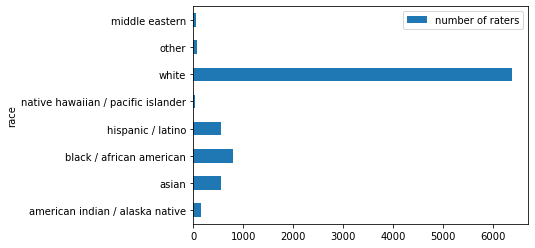

In [51]:
#race_ethnicities = []
#sns.barplot()

df = pd.DataFrame({'race':['american indian / alaska native', 'asian', 'black / african american', 
                                       'hispanic / latino', 'native hawaiian / pacific islander', 'white', 
                                     'other', 'middle eastern'], 
                   'number of raters':[154, 552, 791, 560, 28, 6373, 80, 51]})


ax = df.plot(x='race', y='number of raters', kind='barh')

In [ ]:
#np.unique(data_multi['demo_age'], return_counts=True)

data_multi['demo_age'].value_counts()


#year of birth 
#2002(1)....1919(185)

In [ ]:
 df_age = data_multi.drop_duplicates(['labeler_id', 'demo_age'])['demo_age'].value_counts().reset_index()
 df_age

In [ ]:
#maybe do list iteration here / for loop to get 0 = certain age, 1 = certain age
#the nchange the ticks so they're smaller?

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='demo_age', y='index', data=df_age)
#need to clean up xlabels
#need to assign numbers 1-185 to years 

In [ ]:
#income = np.unique(data_multi['demo_income'], return_counts=True)

data_multi['demo_income'].value_counts()
#household income, before taxes
#10,000 or less (1)
#10,001 - 50,000 (2)
#50,001 - 100,000 (3)
#100,001 - 200,004 (4)
#more than 200,000 (5)

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_income'])['demo_income'].value_counts()

In [ ]:
df_income = pd.DataFrame({'income':['10k or less', '10k - 50k', '50k - 100k', '100k - 200k', '>200k'], 
                   'number of raters':[375, 3321, 3079, 1009, 122]})

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='income', y='number of raters', data=df_income)

In [ ]:
#np.unique(data_multi['demo_religion_1'], return_counts=True)
#atheist (1)

data_multi['demo_religion_1'].value_counts()



In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_religion_1'])['demo_religion_1'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_2'], return_counts=True)
#buddhist (2)

data_multi['demo_religion_2'].value_counts()


In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_2'])['demo_religion_2'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_11'], return_counts=True)
#christian (11)

data_multi['demo_religion_11'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_11'])['demo_religion_11'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_4'], return_counts=True)
#hindu (4)
data_multi['demo_religion_4'].value_counts()


In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_4'])['demo_religion_4'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_5'], return_counts=True)
#jewish (5)
data_multi['demo_religion_5'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_5'])['demo_religion_5'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_7'], return_counts=True)
#mormon (7)
data_multi['demo_religion_7'].value_counts()


In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_7'])['demo_religion_7'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_8'], return_counts=True)
#muslim (8)
data_multi['demo_religion_8'].value_counts()


In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_8'])['demo_religion_8'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_9'], return_counts=True)
#nothing in particular (9)
data_multi['demo_religion_9'].value_counts()


In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_9'])['demo_religion_9'].value_counts()

In [ ]:
np.unique(data_multi['demo_religion_10'], return_counts=True)
#other (10)
data_multi['demo_religion_10'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_10'])['demo_religion_10'].value_counts()

In [ ]:
df = pd.DataFrame({'religion':['atheist', 'buddhist', 'christian', 'hindu', 
                               'jewish', 'mormon', 'muslim', 'nothing in particular', 'other'], 
                   'number of raters':[1608, 126, 3350, 37, 128, 60, 56, 2191, 497]})


ax = df.plot.bar(x='religion', y='number of raters', rot=70)

In [ ]:
np.unique(data_multi['demo_sexual_orien_1'], return_counts=True)
#straight / heterosexual
data_multi['demo_sexual_orien_1'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_1'])['demo_sexual_orien_1'].value_counts()

In [ ]:
np.unique(data_multi['demo_sexual_orien_2'], return_counts=True)
#gay or lesbian
data_multi['demo_sexual_orien_2'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_2'])['demo_sexual_orien_2'].value_counts()

In [ ]:
np.unique(data_multi['demo_sexual_orien_3'], return_counts=True)
#bisexual 
data_multi['demo_sexual_orien_3'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_3'])['demo_sexual_orien_3'].value_counts()

In [ ]:
np.unique(data_multi['demo_sexual_orien_4'], return_counts=True)
#other
data_multi['demo_sexual_orien_4'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_4'])['demo_sexual_orien_4'].value_counts()

In [ ]:
np.unique(data_multi['demo_sexual_orien_5'], return_counts=True)
#prefer not to say
data_multi['demo_sexual_orien_5'].value_counts()

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_5'])['demo_sexual_orien_5'].value_counts()

In [ ]:
df = pd.DataFrame({'sexual orientation':['straight / heterosexual', 'gay / lesbian', 'bisexual', 
                                       'other', 'prefer not to say'], 
                   'number of raters':[6727, 308, 727, 124, 63]})


ax = df.plot.bar(x='sexual orientation', y='number of raters', rot=70)
#lightning bar 

In [ ]:
data_sexual_orientation = [['straight', 6727] , ['gay / lesbian', 308], ['bisexual', 727], ['other', 124], ['prefer not to say', 63]]
sexual_orientation = pd.DataFrame(data_sexual_orientation, columns = ['Sexual Orientation', 'Number of Raters']) 

In [ ]:
sexual_orientation

In [ ]:
np.unique(data_multi['demo_ideology'], return_counts=True)

data_multi['demo_ideology'].value_counts()
#extremely liberal (1)
#liberal (2)
#slightly liberal (3)
#neither libreral nor conservative (4)
#slightly conservative (5)
#conservative (6)
#extremely conservative (7)
#haven't thought much about it (8)

#i think nans across all these questions are just ppl who skipped thesee 

In [ ]:
#turn this into a dataframe
data_multi.drop_duplicates(['labeler_id', 'demo_ideology'])['demo_ideology'].value_counts()

In [ ]:
data_ideology = [['extremely liberal', 1065] , ['liberal', 1968], ['slightly liberal', 1242], ['neither liberal nor conservative', 1367], ['slightly conservative', 860], ['conservative', 895], ['extremely conservative', 264], ['idk', 249]]
demo_ideology = pd.DataFrame(data_ideology, columns = ['Political Ideology', 'Number of Raters']) 

In [ ]:
demo_ideology

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='Political Ideology', y = 'Number of Raters', 
            data=demo_ideology, palette ='hls', saturation = 8)

for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 



#barplot returns a matplotlib.axes object so you have to do this way
#FacetGrid object is different --> rotate label text in seaborn factorplot

# **SECTION 4: DISTRIBUTION OF RATERS BASED ON DEMOGRAPHIC GROUP TO TARGETED GROUP IN POSTS**

In [ ]:
display(data_multi, data)
pd.options.display.max_rows

In [ ]:


#this has degree of hate speech, target identity in post, and rater demographic background 
df3 = pd.merge(data_multi, data_identity)

In [ ]:
pd.set_option('display.max_rows', 500)
df3

## **Correlations between annotator's race and hate speech score**

In [ ]:
#add data here again with google drive connection

In [ ]:
#what do we want to be looking at here?

#dataset on per sample basis - hate speech score at the comment level


#feature at the annotator level - severity 
#1 severity per annotator and listed for every sample in the dataset
#split up as function of annotator identity

#higher severity less likely to call a comment hate speech
#of the 10 items, let's look at humiliation 

#high severity -- more strict in going to extreme [confirm with Chris]
#higher severity means you are less likely to assign "hate speechyness"

#original or full versions? depends on dataset
#collapsed dataset -- where we start

In [ ]:
# annotator: black
# comment: hate speech black people 

#what is the comparision here?
#severity which is agnostic to comment and hate speech score itself

#look at the item values themselves -- for the same comment
#choose comment targets based on race
#look at annotators and divide based on white and non-white annotators 
#see if there is a difference in sentiment or humiliation 

#look at annotators themselves -- simple & general
#what are the average severities or distribution of severities per racial group of the annotators?

#then going into comment by comment basis above

#severity is continuous variable so compare histogram of the two adn statistics
#are men more severe in their hate speech ratings than women? and similary on race basis
#run t-test
#mainly descriptive 


In [ ]:
#is it typical for a comment ot be rated by particular group diverse gropu ppl?

#the data might not be dense enough to look at racial groups 
#might have to do white vs non white
#but knowing the answer: How many different racial groups are represented?

#what is the distribution of annotators rating comments? so comment 
#might be rated by 3 different racial groups in terms of the comment
#another might be just one group (all white)
#so if the mode is 1 there's only so much we can do 

In [ ]:
data_multi.head(5)

#data_multi.shape

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


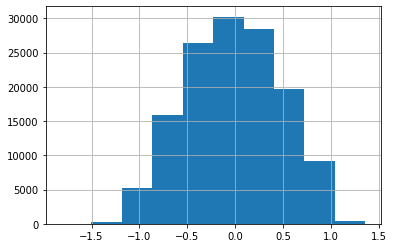

In [ ]:
#this is severity item for raters
data_multi['rater_measure'].hist()

In [ ]:
 #alaskan native: 1

 data_multi['demo_race_ethnicitie_6'].value_counts(dropna=False)

#distribution of severities for white raters vs non white raters

1.0    109090
NaN     26466
Name: demo_race_ethnicitie_6, dtype: int64

In [ ]:
#number of unique labeler ids
#get only the unique annotators bc their severity will be repeated

data_multi['labeler_id'].value_counts(dropna=False)

1410    26
4997    26
3887    26
4521    26
8565    26
        ..
8466     6
8564     6
8003     6
7558     6
6695     6
Name: labeler_id, Length: 7912, dtype: int64

In [ ]:
data_multi[data_multi['labeler_id'] == 1410]['rater_measure'] 
#propensity of annotator to be severe
#rater measure is a paramater in the IRT model that max log likelihood
#outputted by facets when fit IRT model to data

#another proxy could be sum of the items as a proxy
#hate speech score could just be describing the comments
#metric that the labeler gave but describes comment itself 
#function as a measure to disambiguate between black and white raters for different types of comments
#and that sum should correlate with the hate speech score - proxy in IRT lit

683       0.35
5242      0.35
9875      0.35
14518     0.35
19139     0.35
23781     0.35
28387     0.35
33017     0.35
37592     0.35
42228     0.35
46809     0.35
51484     0.35
56089     0.35
60682     0.35
65309     0.35
69939     0.35
74521     0.35
79120     0.35
83745     0.35
88390     0.35
93397     0.35
101017    0.35
108542    0.35
116112    0.35
123312    0.35
129486    0.35
Name: rater_measure, dtype: float64

In [ ]:
#drop duplicates in pandas

#number of unique labeler_ids: 7,912
data_multi_unique = data_multi.drop_duplicates('labeler_id')



In [ ]:
#subset datframe so we only get the rows = 1 

#store this as a white rater df
data_white = data_multi_unique[data_multi_unique['demo_race_ethnicitie_6'] == 1]

In [ ]:
#POC rater df
data_POC = data_multi_unique[data_multi_unique['demo_race_ethnicitie_6'] != 1]

In [ ]:
#sanity check

print(data_white.shape)
data_POC.shape

(6373, 135)


(1539, 135)

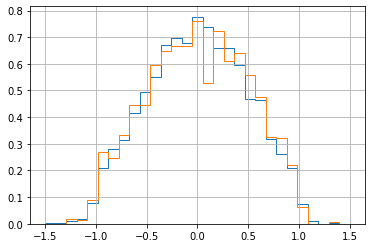

In [ ]:
#plot hist data white rater measure and data poc rater meausure

data_white['rater_measure'].hist(density=True, bins=np.linspace(-1.5, 1.5, 30), histtype='step');
data_POC['rater_measure'].hist(density=True, bins=np.linspace(-1.5, 1.5, 30), histtype='step'); #orange is POC histogram


#this is just raw counts so need to normalize (density=True)
#choose bins for comparison purposes -- linspace
#step gives boundary so not on stop of each other

#rater measure similar


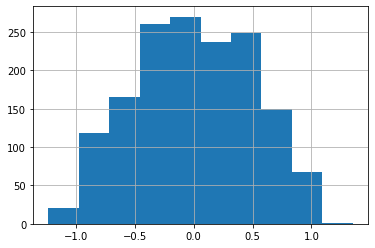

In [ ]:
data_POC['rater_measure'].hist();

#there seems to be more spread in the POC hist for rater measure than for white hist
#why is that?
#is that bc there is less data for POC?

In [ ]:
#look at the item values themselves -- for the same comment
#choose comment targets based on race
#look at annotators and divide based on white and non-white annotators 
#see if there is a difference in sentiment or humiliation 


data_multi.head(5)

#percentage of comments that 
#helper function takes as input df and comment ID
#3 tuple with races of 3 labelers
#cycle through comment id in loop and inside loop hve function 


,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


In [ ]:
data_multi['comment_id'].value_counts()

#comment 20011 shows up 815 times?



20011    815
20002    801
20001    799
20007    796
20014    793
        ... 
32639      1
23062      1
45993      1
10714      1
37304      1
Name: comment_id, Length: 39565, dtype: int64

In [ ]:
#do any of the labelers show up more than once in the comments that repeat?
#for every comment ID that shows up >1, what labeler IDs show up more than 1?


# for column in data_multi[['comment_id', 'labeler_id']]:
#   columnSeriesObj = data_multi[column]
#   if data_multi[column] > 1:



#one solution -- collapse those 
#have they given self contradictory reviews to the comments?






In [20]:
v = data_multi.comment_id.value_counts()

#this is the length of the df where comment_id shows up more than once
print(len(data_multi[data_multi.comment_id.isin(v.index[v.gt(1)])]))



125479


In [ ]:
#turning comment id more than once into a new df 

data_multi_comment2 = data_multi[data_multi.comment_id.isin(v.index[v.gt(2)])]

len(data_multi_comment2)

101207

In [21]:
#but a distribution should really be plotted for > 30

data_multi_comment30 = data_multi[data_multi.comment_id.isin(v.index[v.gt(30)])]
len(data_multi_comment30)

43227

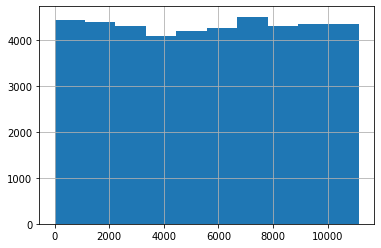

In [ ]:
#so now in this df of comment IDs that repeat at least 30 times
#what is the distribution of labeler IDs?



data_multi_comment30['labeler_id'].hist();

In [ ]:
#for comment IDs that repeat >= 30 what is the value counts of labeler ids
data_multi_comment30['labeler_id'].value_counts()

6259     6
1489     6
3472     6
1425     6
7570     6
        ..
10027    1
8252     1
9272     1
8562     1
9624     1
Name: labeler_id, Length: 7912, dtype: int64

In [22]:
#for those labeler IDs that repeat, do they repeat for the same comment?
data_multi_labeler2 = data_multi_comment30[data_multi_comment30.labeler_id.isin(v.index[v.gt(2)])]

data_multi_labeler2[['comment_id', 'labeler_id']]

#for each unique comment, the number of labeler_ids
#group by?
#df.groupby(by=["b"]).sum()

data_multi_labeler2.groupby(by=['comment_id', 'labeler_id']).count()


sentiment  respect  insult  humiliate  status  \
comment_id labeler_id                                                  
20001      76                  1        1       1          1       1   
           85                  1        1       1          1       1   
           86                  1        1       1          1       1   
           145                 1        1       1          1       1   
           221                 1        1       1          1       1   
...                          ...      ...     ...        ...     ...   
20070      10887               1        1       1          1       1   
           10906               1        1       1          1       1   
           10924               1        1       1          1       1   
           10942               1        1       1          1       1   
           11009               1        1       1          1       1   

                       dehumanize  violence_phys  genocide  attack_defend  \
comment_id labeler_id                                                       
20001      76                   1              1         1              1   
           85                   1              1         1              1   
           86                   1              1         1              1   
           145                  1              1         1              1   
           221                  1              1         1              1   
...                           ...            ...       ...            ...   
20070      10887                1              1         1              1   
           10906                1              1         1              1   
           10924                1              1         1              1   
           10942                1              1         1              1   
           11009                1              1         1              1   

                       hatespeech  ...  demo_sexual_orien_2  \
comment_id labeler_id              ...                        
20001      76                   1  ...                    0   
           85                   1  ...                    0   
           86                   1  ...                    0   
           145                  1  ...                    0   
           221                  1  ...                    0   
...                           ...  ...                  ...   
20070      10887                1  ...                    0   
           10906                1  ...                    0   
           10924                1  ...                    0   
           10942                1  ...                    0   
           11009                1  ...                    0   

                       demo_sexual_orien_3  demo_sexual_orien_4  \
comment_id labeler_id                                             
20001      76                            0                    0   
           85                            0                    0   
           86                            0                    0   
           145                           0                    0   
           221                           0                    0   
...                                    ...                  ...   
20070      10887                         1                    0   
           10906                         0                    0   
           10924                         0                    0   
           10942                         0                    0   
           11009                         0                    0   

                       demo_sexual_orien_5  demo_sexual_orien_4_text  \
comment_id labeler_id                                                  
20001      76                            0                         1   
           85                            0                         1   
           86                            0                         1   
           145                  

In [ ]:
data_multi_labeler2.groupby(by=['labeler_id', 'comment_id']).count()

#turn these two indexes into some sort of list

sentiment  respect  ...  identity  hypothesis
labeler_id comment_id                      ...                      
1          20007               1        1  ...         1           1
           20019               1        1  ...         1           1
           20029               1        1  ...         1           1
           20034               1        1  ...         1           1
           20055               1        1  ...         1           1
...                          ...      ...  ...       ...         ...
11141      20018               1        1  ...         1           1
           20032               1        1  ...         1           1
           20053               1        1  ...         1           1
           20057               1        1  ...         1           1
           20066               1        1  ...         1           1

[15487 rows x 133 columns]

In [23]:
df_index = data_multi_labeler2.groupby(by=['labeler_id', 'comment_id']).count()

In [ ]:
df_index.loc[1]

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,target_race_6,target_race_7,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
comment_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20007,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1
20019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1
20029,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1
20034,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1
20055,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1
20059,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1


In [49]:
# #empty list
# label_comment_id_list = []

# #looping through the index and appending to list
# for i in df_index.index:
#   #print(i) #they are in tuple pairs: labeler_id, comment_id
#   label_comment_id_list.append(i) #this is now a list of tuples

# print(label_comment_id_list)
#   #print(df_index.loc[i])

In [ ]:
#so in the prevoius one we have a dictionary for only one key and one value

# we want one key value pair with a list of values

In [48]:
# from collections import defaultdict
# dictionary_tuples = defaultdict(list)


# for i, j in label_comment_id_list:
#   dictionary_tuples[i].append(j)

# print(dictionary_tuples)

In [ ]:
#now i have to see if there are any labelers who are assigned to the same comment more than once

#for any key-values in the dictionary are there repeats of the values

#this approach takes forever

# desired_keys = []

# vals = list(dictionary_tuples.values())

# for key, value in dictionary_tuples.items():
#   for grouping in vals:
#     if vals.count(value) > 1:
#       desired_keys.append(key)

# print(desired_keys)

In [47]:

# vals = list(dictionary_tuples.values())
# print(vals)

In [ ]:
#trying list comprehension to see if this makes it faster -- it does not

# [[key for grouping in vals if vals.count(value) > 1] for key, value in dictionary_tuples.items()]

In [ ]:
# flipped = {}

# for key, value in dictionary_tuples.items():
#   if value not in flipped:
#     flipped[value] = [key]
#   else:
#     flipped[value].append[key]

In [46]:
# dictionary_tuples.items()

In [ ]:
values_list = []
for key, value in dictionary_tuples.items():
  values_list.append(value)
#print(values_list)

In [ ]:
#print(values_list)

In [ ]:
values_list

for mini_list in values_list:
  for item in mini_list:
    if mini_list.count(item) > 1:
       print(item)
    # else:
    #   print('no duplicates')

#this means that there are no labelers who saw the same comment

In [ ]:
#now thatw we know that there are no duplicates, we can visualize the barplot of races for comments


#we don't want to plot the distribution of races for *all* comments that showed up more than 30 times
#so let's just look at the top 5 to start with 

# Comment number of labelers
# 20011    815
# 20002    801
# 20001    799
# 20007    796
# 20014    793

 **data_multi_comment30**: this is a dataframe that includes comment ids whose value counts are greater than 30

**data_multi_labeler2**: this is a dataframe for comment ids whose values counts are greater than 30 AND whose labeler ID value counts are greater than 2




In [ ]:
data_multi_labeler2.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7',
       'target_race_7_text', 'target_religion_1', 'target_religion_2',
       'target_religion_4', 'target_religion_5', 'target_religion_8',
       'target_religion_9', 'target_religion_10', 'target_religion_6',
       'target_religion_6_te

In [ ]:
data_multi_labeler2['comment_id'].value_counts()

20007    297
20034    297
20021    293
20012    291
20020    288
        ... 
20050    122
20032    121
20026    121
20042    104
20036    103
Name: comment_id, Length: 70, dtype: int64

In [24]:
df_race_distribution = data_multi_labeler2[['comment_id', 'labeler_id', 'demo_race_ethnicitie_1',
       'demo_race_ethnicitie_2', 'demo_race_ethnicitie_3',
       'demo_race_ethnicitie_4', 'demo_race_ethnicitie_5',
       'demo_race_ethnicitie_8', 'demo_race_ethnicitie_6', 'demo_race_ethnicitie_7', 'demo_race_ethnicitie_7_text',
       'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7', 'target_race_7_text']]

      

In [ ]:
df_race_distribution.head(5)

,comment_id,labeler_id,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,target_race_6,target_race_7,target_race_7_text
92316,20047,4727,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Ethnic Jew
92317,20045,10873,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Israel
92319,20068,2790,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,
92320,20002,3379,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
92321,20023,1834,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,


In [ ]:
#this is dictionary comprehension with the column names as keys and the index as values
{c: i for i, c in enumerate(df_race_distribution.columns)}

{'comment_id': 0,
 'demo_race_ethnicitie_1': 2,
 'demo_race_ethnicitie_2': 3,
 'demo_race_ethnicitie_3': 4,
 'demo_race_ethnicitie_4': 5,
 'demo_race_ethnicitie_5': 6,
 'demo_race_ethnicitie_6': 8,
 'demo_race_ethnicitie_7': 9,
 'demo_race_ethnicitie_7_text': 10,
 'demo_race_ethnicitie_8': 7,
 'labeler_id': 1,
 'target_race_1': 11,
 'target_race_2': 12,
 'target_race_3': 13,
 'target_race_4': 15,
 'target_race_5': 16,
 'target_race_6': 17,
 'target_race_7': 18,
 'target_race_7_text': 19,
 'target_race_8': 14}

In [ ]:
#this gives the column name and the number of NANs in that column
for column in df_race_distribution:
  value = df_race_distribution[column].isna().sum()
  print(column, value)






comment_id 0
labeler_id 0
demo_race_ethnicitie_1 15187
demo_race_ethnicitie_2 14535
demo_race_ethnicitie_3 13850
demo_race_ethnicitie_4 14494
demo_race_ethnicitie_5 15424
demo_race_ethnicitie_8 15411
demo_race_ethnicitie_6 3010
demo_race_ethnicitie_7 15364
demo_race_ethnicitie_7_text 0
target_race_1 11614
target_race_2 13942
target_race_3 14180
target_race_8 14023
target_race_4 15026
target_race_5 15092
target_race_6 14607
target_race_7 14880
target_race_7_text 0


In [ ]:
#for all of the labelers how many opted out?

#of the rows how many have NA for all of these ethnicities 

#losing ~600 raters may be a lot 

In [ ]:
#sanity check using value counts - yes it works

df_race_distribution['demo_race_ethnicitie_1'].value_counts(dropna=False)

NaN    15187
1.0      300
Name: demo_race_ethnicitie_1, dtype: int64

In [ ]:
df_race_distribution.isna().sum().sum()

220639

In [25]:
#need to drop the NANs for all df

df_race_distribution.fillna('NA', inplace=True)


/home/rbarreto/miniconda3/envs/hatespeech/lib/python3.9/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
#sanity check to see if the NANs were replaced with declined
df_race_distribution.head(5)

,comment_id,labeler_id,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,target_race_6,target_race_7,target_race_7_text
92316,20047,4727,NA,NA,NA,NA,NA,NA,1.0,NA,,NA,NA,NA,NA,NA,NA,NA,1.0,Ethnic Jew
92317,20045,10873,NA,NA,NA,NA,NA,NA,1.0,NA,,1.0,NA,NA,NA,NA,NA,NA,1.0,Israel
92319,20068,2790,NA,NA,NA,NA,NA,NA,1.0,NA,,NA,NA,NA,1.0,NA,NA,NA,NA,
92320,20002,3379,NA,NA,NA,NA,NA,NA,1.0,NA,,1.0,NA,NA,NA,NA,NA,NA,NA,
92321,20023,1834,NA,1.0,NA,NA,NA,NA,NA,NA,,NA,NA,1.0,NA,NA,NA,NA,NA,


In [ ]:
#these were the top 6 comments with labelers for the dataframe that had valuecounts for comments >30

# Comment number of labelers
# 20011    815
# 20002    801
# 20001    799
# 20007    796
# 20014    793

#BUT for the dataframe that has valuecounts for commetns >30 and labelers >2, these are the top comments

# Comment number of labelers
# 20007    297
# 20034    297
# 20021    293
# 20012    291
# 20020    288

#now let's double check to see how many comments have many labelers

df_race_distribution['comment_id'].value_counts() #we can work with this

20007    297
20034    297
20021    293
20012    291
20020    288
        ... 
20050    122
20032    121
20026    121
20042    104
20036    103
Name: comment_id, Length: 70, dtype: int64

In [27]:
#rename the columns
df_race_distribution.rename(columns={'demo_race_ethnicitie_1': 'demo_american_indian_alaska_native',
                                       'demo_race_ethnicitie_2': 'demo_asian',
                                       'demo_race_ethnicitie_3': 'demo_black',
                                       'demo_race_ethnicitie_4': 'demo_latino',
                                       'demo_race_ethnicitie_5': 'demo_native_hawaiian_pacific_islander',
                                       'demo_race_ethnicitie_6': 'demo_white',
                                       'demo_race_ethnicitie_7': 'demo_other_race',
                                       'demo_race_ethnicitie_7_text': 'demo_other_race_text',
                                       'demo_race_ethnicitie_8': 'demo_middle_eastern',
                                       'target_race_1': 'target_black',
                                       'target_race_2': 'target_latino',
                                       'target_race_3': 'target_asian',
                                       'target_race_4': 'target_native american',
                                       'target_race_5': 'target_pacific islander',
                                       'target_race_6': 'target_white',
                                       'target_race_7': 'target_other_race',
                                       'target_race_7_text': 'target_other_race_text'}, inplace=True)
           

    #      'target_race_1': 'black',
                                #  'target_race_2': 'latinx',
                                #  'target_race_3': 'asian',
                                #  'target_race_8': 'middle_eastern',
                                #  'target_race_4': 'native_american',
                                #  'target_race_5': 'pacific_islander',
                                #  'target_race_6': 'white',
                                #  'target_race_7': 'other_race',
                                #  'target_race_7_text': 'other_race_text',


       #'demo_race_ethnicie_1': 'american indian alaska native',
                                  #'demo_race_ethnicitie_2': 'asian',
                                  #'demo_race_ethnicitie_3': 'alack',
                                  #'demo_race_ethnicitie_4': 'latino',
                                  #'demo_race_ethnicitie_5': 'native hawaiian pacific islander',
                                  #'demo_race_ethnicitie_8': 'middle eastern',
                                  #'demo_race_ethnicitie_6': 'white',
                                  #'demo_race_ethnicitie_7': 'other race',


                            

/home/rbarreto/miniconda3/envs/hatespeech/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
#np.nam.sum

In [28]:
#then create a new column that's just an aggregate of the other column

def label_race(row):
    if row['demo_american_indian_alaska_native'] == 1:
        return 'american indian alaska native'

    if row['demo_american_indian_alaska_native'] + row['demo_asian'] + row['demo_black'] + row['demo_latino'] + row['demo_native_hawaiian_pacific_islander'] + row['demo_white'] + row['demo_other_race'] + row['demo_middle_eastern'] > 1:
        return 'two or more races'

    if row['demo_asian'] == 1:
        return 'asian'
    if row['demo_black'] == 1:
        return 'black'
    if row['demo_latino'] == 1:
        return 'latino'
    if row['demo_native_hawaiian_pacific_islander'] == 1:
        return 'native hawaiian pacific islander'
    if row['demo_white'] == 1:
        return 'white'
    if row['demo_other_race'] == 1:
        return 'other race'
    if row['demo_middle_eastern'] == 1:
        return 'middle eastern'
    return 'unknown'

#what's going to happen to the cases that are more than one bc they're not mutually exclusive (races)?
#tried to solve this through two or more races option


In [29]:
#applying function to df
#making the NAs into 0 for the function above to work

df_race_distribution.replace('NA', 0).apply(label_race, axis=1) #axis =1 means application is done at row rather than column lelvel


92316                             white
92317                             white
92319                             white
92320                             white
92321                             asian
                      ...              
135529                            black
135531                            white
135535                            white
135539    american indian alaska native
135540                           latino
Length: 15487, dtype: object

In [ ]:
# '2'+3.0
# this type of error was being given befor ei replaced the NA with 0
#TypeError: can only concatenate str (not "float") to str

In [30]:
#saving results in new column in orginal df

df_race_distribution['race_label'] = df_race_distribution.replace('NA', 0).apply(label_race, axis=1)

<ipython-input-30-f0e3cf8e39bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race_distribution['race_label'] = df_race_distribution.replace('NA', 0).apply(label_race, axis=1)


In [31]:
df_race_distribution['race_label'].value_counts()

#need to investigate who are these 4 unknowns?
#i made unknown the return if none of the conditions in the function applied so i could've missed something

white                               11579
black                                1341
two or more races                     783
asian                                 749
latino                                613
american indian alaska native         300
other race                             85
native hawaiian pacific islander       17
middle eastern                         16
unknown                                 4
Name: race_label, dtype: int64

In [ ]:
df_race_distribution.shape

(15487, 21)

In [ ]:
data_multi.shape

(135556, 135)

In [32]:
#df of the column 20007
df_comment_20007 = df_race_distribution[df_race_distribution['comment_id'] == 20007]

In [ ]:
df_comment_20007['demo_american_indian_alaska_native'].value_counts(dropna=False)

NA     291
1.0      6
Name: demo_american_indian_alaska_native, dtype: int64

In [ ]:
df_comment_20007['comment_id'].value_counts()

20007    297
Name: comment_id, dtype: int64

In [36]:
df_comment_20007['race_label'].value_counts()

white                               219
black                                27
latino                               15
asian                                15
two or more races                    12
american indian alaska native         6
unknown                               1
native hawaiian pacific islander      1
other race                            1
Name: race_label, dtype: int64

In [45]:
data_multi[data_multi['comment_id'] == 20007]['predict_text']

99928     Every slant in #LosAngeles should be deported....
99936     Every slant in #LosAngeles should be deported....
99941     Every slant in #LosAngeles should be deported....
99947     Every slant in #LosAngeles should be deported....
99955     Every slant in #LosAngeles should be deported....
                                ...                        
107390    Every slant in #LosAngeles should be deported....
107408    Every slant in #LosAngeles should be deported....
107415    Every slant in #LosAngeles should be deported....
107416    Every slant in #LosAngeles should be deported....
107433    Every slant in #LosAngeles should be deported....
Name: predict_text, Length: 796, dtype: object

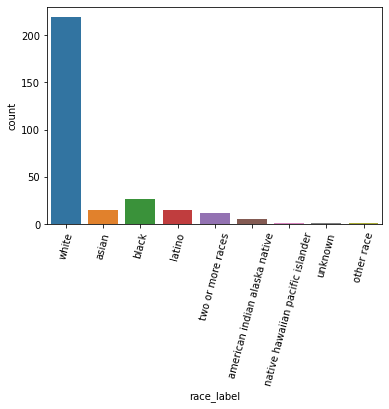

In [42]:
#then plot the distribution of races (barplot) for a particular comment

ax = sns.countplot(x='race_label', data=df_comment_20007)

labels = ['white', 'asian', 'black', 'latino', 'two or more races', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']
          
#x.set_xticklabels(labels)
# ax.set_ylabel('Number of Raters')
# ax.set_xlabel('Race')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
    name.set_rotation(75) https://www.theguardian.com/books/booksblog/2007/apr/04/dontdiagnosefictionalcharac#:~:text=Darcy's%20%22unaccountable%20rudeness%22%2C%20she,reference%20to%20the%20autistic%20spectrum.



In [ ]:
# 20034    297

df_comment_20034 = df_race_distribution[df_race_distribution['comment_id'] == 20034]

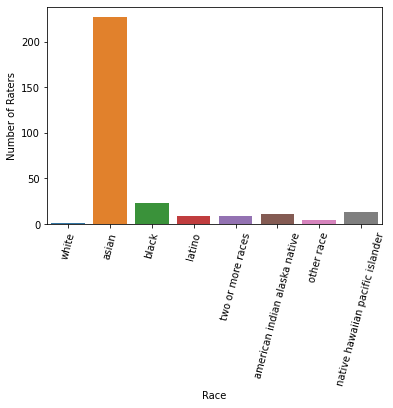

In [ ]:
ax = sns.countplot(x='race_label', data=df_comment_20034)

labels = ['white', 'asian', 'black', 'latino', 'two or more races', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Race')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
# 20021    293
df_comment_20021 = df_race_distribution[df_race_distribution['comment_id'] == 20021]

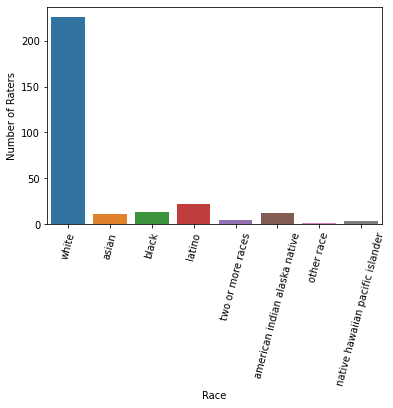

In [ ]:
ax = sns.countplot(x='race_label', data=df_comment_20021)

labels = ['white', 'asian', 'black', 'latino', 'two or more races', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Race')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
# 20012    291
df_comment_20012 = df_race_distribution[df_race_distribution['comment_id'] == 20012]

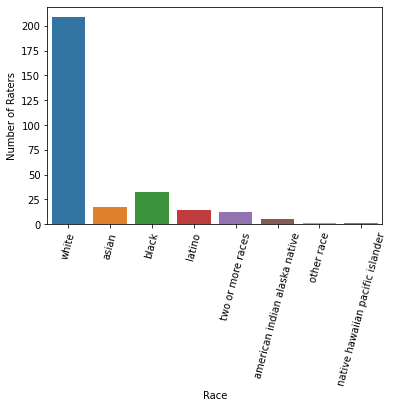

In [ ]:
ax = sns.countplot(x='race_label', data=df_comment_20012)

labels = ['white', 'asian', 'black', 'latino', 'two or more races', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Race')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
# 20020    288

df_comment_20020 = df_race_distribution[df_race_distribution['comment_id'] == 20020]

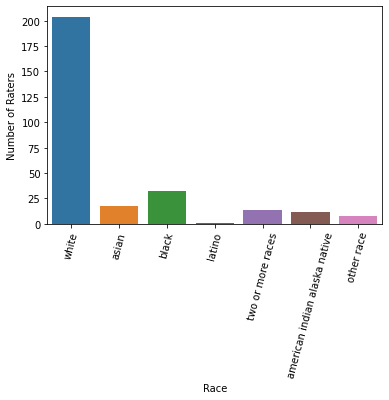

In [ ]:
ax = sns.countplot(x='race_label', data=df_comment_20020)

labels = ['white', 'asian', 'black', 'latino', 'two or more races', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Race')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
#distinction between white labelers and non white labelers in distribution of sum of instrument scores



df_race_distribution.head(5)

data_multi.head(5)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


In [ ]:
items_labelers = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech']

In [ ]:
data_multi['hate_speech_sum'] = data_multi[items_labelers].sum(axis=1)

In [ ]:
data_multi['demo_race_ethnicitie_1'].value_counts(dropna=False)

NaN    132920
1.0      2636
Name: demo_race_ethnicitie_1, dtype: int64

In [ ]:
data_multi.rename(columns={'demo_race_ethnicitie_1': 'demo_american_indian_alaska_native',
                                       'demo_race_ethnicitie_2': 'demo_asian',
                                       'demo_race_ethnicitie_3': 'demo_black',
                                       'demo_race_ethnicitie_4': 'demo_latino',
                                       'demo_race_ethnicitie_5': 'demo_native_hawaiian_pacific_islander',
                                       'demo_race_ethnicitie_6': 'demo_white',
                                       'demo_race_ethnicitie_7': 'demo_other_race',
                                       'demo_race_ethnicitie_7_text': 'demo_other_race_text',
                                       'demo_race_ethnicitie_8': 'demo_middle_eastern',
                                       'target_race_1': 'target_black',
                                       'target_race_2': 'target_latino',
                                       'target_race_3': 'target_asian',
                                       'target_race_4': 'target_native american',
                                       'target_race_5': 'target_pacific islander',
                                       'target_race_6': 'target_white',
                                       'target_race_7': 'target_other_race',
                                       'target_race_7_text': 'target_other_race_text'}, inplace=True)

In [ ]:
data_multi['label_race'] = data_multi.apply(label_race, axis=1)

In [ ]:
data_multi.groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean()

comment_id  label_race
1           latino        13.000000
            white         14.666667
2           asian          9.000000
            white         14.500000
3           white         10.666667
                            ...    
50066       white         19.333333
50067       white         15.000000
50068       white          2.000000
50069       white         15.000000
50070       white         18.333333
Name: hate_speech_sum, Length: 58644, dtype: float64

In [ ]:
#getting comment_ids
data_multi[data_multi['label_race'] == 'black']['comment_id'].values

array([13168,  4373,  1323, ..., 20069, 20065, 20067], dtype=int32)

In [ ]:
#comment ids for blakc
array_black = data_multi[data_multi['label_race'] == 'black']['comment_id'].values

list_black = array_black.tolist()

# list_black

In [ ]:
#comment_ids for white
array_white = data_multi[data_multi['label_race'] == 'white']['comment_id'].values

list_white = array_white.tolist()

# list_white

In [ ]:
#find set of commonalities between list_black and list_white

list_black_as_set = set(list_black)

intersection_set = list_black_as_set.intersection(list_white)

intersection_as_list = list(intersection_set)

In [ ]:
# sanity check
# intersection_as_list

In [ ]:
#try to get only white and black labelers here

data_multi[data_multi['label_race'] == 'white'].groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean()



comment_id  label_race
1           white         14.666667
2           white         14.500000
3           white         10.666667
4           white         10.000000
5           white          5.666667
                            ...    
50066       white         19.333333
50067       white         15.000000
50068       white          2.000000
50069       white         15.000000
50070       white         18.333333
Name: hate_speech_sum, Length: 35855, dtype: float64

In [ ]:
data_multi[data_multi['label_race'] == 'black'].groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean()



comment_id  label_race
17          black         16.0
23          black         20.0
25          black          1.0
26          black          5.0
29          black         13.0
                          ... 
50051       black          6.0
50060       black          6.0
50061       black         15.5
50062       black          7.5
50066       black         12.0
Name: hate_speech_sum, Length: 8096, dtype: float64

In [ ]:
#for comments where there are BOTH black and white labelers
#includes black and white but not only so need to sift out other races

data_multi[data_multi['comment_id'].isin(intersection_as_list)]['label_race'].value_counts()

white                               43127
black                               10855
asian                                3548
latino                               3398
american indian alaska native        1066
other race                            308
native hawaiian pacific islander      113
middle eastern                         92
unknown                                24
Name: label_race, dtype: int64

In [ ]:
filter_races = ['asian', 'latino', 'american indian alaska native', 'other race', 'native hawaiian pacific islander', 'middle eastern', 'unknown']

In [ ]:
#df of only black and white labelers
df_black_white = data_multi[data_multi['comment_id'].isin(intersection_as_list)]


df_black_white = df_black_white[~df_black_white.label_race.isin(filter_races)] 

In [ ]:
#sanity check

df_black_white['label_race'].value_counts()

white    43127
black    10855
Name: label_race, dtype: int64

In [ ]:
#average hate speech sum that black and white labelers gave
df_black_white.groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean()

In [ ]:
df_black_white.head(1)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_black,target_latino,target_asian,target_race_8,target_native american,target_pacific islander,...,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_american_indian_alaska_native,demo_asian,demo_black,demo_latino,demo_native_hawaiian_pacific_islander,demo_middle_eastern,demo_white,demo_other_race,demo_other_race_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis,hate_speech_sum,label_race
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,"Yes indeed. She sort of reminds me of the elder lady that played the part in the movie ""Titanic"" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!",-3.9,0.34,5,0.2,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178,0.0,white


In [ ]:
#spread

import statistics

black_hate_speech_sum = list(df_black_white[df_black_white['label_race'] == 'black']['hate_speech_sum'])
white_hate_speech_sum = list(df_black_white[df_black_white['label_race'] == 'white']['hate_speech_sum'])

print('black hate speech sum spread', statistics.variance(black_hate_speech_sum))
print('white hate speech sum spread', statistics.variance(white_hate_speech_sum))

print('black hate speech sum std dev', statistics.stdev(black_hate_speech_sum))
print('white hate speech sum std dev', statistics.stdev(white_hate_speech_sum))



black hate speech sum spread 40.88295462483207
white hate speech sum spread 45.17162833259767
black hate speech sum std dev 6.393977996899275
white hate speech sum std dev 6.720984178868275


In [ ]:
#rather than just doing it on hate speech sum, for every item in the construct write a for loop that calculates the statistical signifiance of the differences you see




In [ ]:
#turning the value counts into a df
df_black_white_mean = pd.DataFrame(df_black_white.groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean())

In [ ]:
#turning value counts into df

df_black_white_mean = df_black_white.groupby(['comment_id', 'label_race'])['hate_speech_sum'].mean().to_frame('mean_hate_speech_sum').reset_index()

df_black_white_mean

,comment_id,label_race,mean_hate_speech_sum
0,23,black,20.000000
1,23,white,19.000000
2,26,black,5.000000
3,26,white,17.000000
4,29,black,13.000000
...,...,...,...
12871,50061,white,13.000000
12872,50062,black,7.500000
12873,50062,white,6.000000
12874,50066,black,12.000000


In [ ]:
from scipy import stats


#turning mean values to array for black

mean_hate_sum_col_black = df_black_white_mean[df_black_white_mean['label_race'] == 'black']
array_black = mean_hate_sum_col.values

#turning mean values to array for white
mean_hate_sum_col_black = df_black_white_mean[df_black_white_mean['label_race'] == 'white']
array_white = mean_hate_sum_col.values



In [ ]:
#using t test here

from scipy import stats

stats.ttest_ind(array_black, array_white)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [ ]:
#try t-test on df where target is black and labelers are black and white

df_black_target_labelers_both = df_black_white[df_black_white['target_black'] == 1]

#t-test here
black_labelers_black_target = df_black_target_labelers_both[df_black_target_labelers_both['label_race'] == 'black']['hate_speech_sum']

white_labelers_black_target = df_black_target_labelers_both[df_black_target_labelers_both['label_race'] == 'white']['hate_speech_sum']

stats.ttest_ind(black_labelers_black_target, white_labelers_black_target)

Ttest_indResult(statistic=-11.139073428082693, pvalue=1.1385110450783224e-28)

In [ ]:
#fiding differences between white and black labelers in hate speech sum 
diff_values = {}
for cid in np.unique(df_black_white_mean['comment_id']): #i think npunique means we only do it once
  this_df = df_black_white_mean[df_black_white_mean['comment_id'] == cid]
  this_black_val = int(this_df[this_df['label_race'] == 'black']['mean_hate_speech_sum'])
  this_white_val = int(this_df[this_df['label_race'] == 'white']['mean_hate_speech_sum'])
  this_diff = this_black_val - this_white_val
  diff_values[cid] = this_diff
  # print(cid, this_diff)



In [ ]:
df_diff_values = pd.DataFrame.from_dict(diff_values, orient='index')

In [ ]:
df_diff_values.rename(columns={0: 'difference_black_white'}, inplace=True)

In [ ]:
df_diff_values.reset_index(inplace=True)

In [ ]:
df_diff_values.rename(columns={'index': 'comment_id'}, inplace=True)

In [ ]:
df_diff_values.sort_values(by=['difference_black_white'])

#when it's negative it means that black raters gave a lower value than white labelers on average
#when it's positive it means black raters gave a higher value than white labelers on average

,comment_id,difference_black_white
2136,16566,-16
5747,45062,-15
5327,42166,-14
4019,31339,-14
3656,28247,-14
...,...,...
6225,48509,14
5915,46335,15
3556,27429,15
5899,46188,16


In [ ]:
df_black_higher = df_diff_values[df_diff_values['difference_black_white'] >=1]

black_higher_list = df_black_higher['comment_id'].tolist()

# black_higher_list

In [ ]:
data_multi[data_multi['comment_id'] == 6788]

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_black,target_latino,target_asian,target_race_8,target_native american,target_pacific islander,...,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_american_indian_alaska_native,demo_asian,demo_black,demo_latino,demo_native_hawaiian_pacific_islander,demo_middle_eastern,demo_white,demo_other_race,demo_other_race_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis,hate_speech_sum,label_race
11881,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6788,reddit,eq6tth9,That's mentally ill.,-0.49,0.34,3,0.333333,1,1.0,3671,0.51,1.23,2.18,0.83,0.69,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,123.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,28.999298095703125,-81.50299835205078125,0.889122,-0.188702,6.0,white
32381,4.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,6788,reddit,eq6tth9,That's mentally ill.,-0.49,0.34,3,0.333333,1,1.0,2251,-0.42,1.16,1.48,0.83,0.69,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,2.0,,2.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,,107.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.7787017822265625,-96.8217010498046875,0.889122,-0.188702,16.0,asian
82527,3.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,6788,reddit,eq6tth9,That's mentally ill.,-0.49,0.34,3,0.333333,1,1.0,7989,-0.08,0.93,0.70,0.83,0.69,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,113.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,NaN,1.0,NaN,NaN,NaN,,1.0,42.32470703125,-87.8563995361328125,0.889122,-0.188702,13.0,white


In [ ]:
#sort data multi by these comment_ids that are positive

df_black_higher_full = data_multi[data_multi['comment_id'].isin(black_higher_list)]



In [ ]:
df_black_higher_full.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_black',
       'target_latino', 'target_asian', 'target_race_8',
       'target_native american', 'target_pacific islander',
       'target_white', 'target_other_race', 'target_other_race_text',
       'target_religion_1', 'target_religion_2', 'target_religion_4',
       'target_religion_5', 'target_religion_8', 'target_religion_9',
       'target_religion_10', 'target_religion_6

In [ ]:
pd.set_option('display.max_colwidth', None)
#top five differences in these comment ids
# 48509	14
# 46335	15
# 27429	15
# 46188	16
# 6768 17

df_black_higher_full[df_black_higher_full['comment_id'] == 48509][['predict_text', 'hate_speech_sum', 'label_race']]

,predict_text,hate_speech_sum,label_race
12970,"Women, I f with this. Mah asian brethren standup and vibe with the waves",19.0,black
58168,"Women, I f with this. Mah asian brethren standup and vibe with the waves",5.0,white


In [ ]:

df_black_higher_full[df_black_higher_full['comment_id'] == 6768][['predict_text', 'hate_speech_sum', 'label_race']]

,predict_text,hate_speech_sum,label_race
10460,"As a fellow big-tiddied woman, and as a bisexual, I can assure you. It's fucking great.",1.0,white
58429,"As a fellow big-tiddied woman, and as a bisexual, I can assure you. It's fucking great.",2.0,white
82037,"As a fellow big-tiddied woman, and as a bisexual, I can assure you. It's fucking great.",18.0,black


In [ ]:

df_black_higher_full[df_black_higher_full['comment_id'] == 46188][['predict_text', 'hate_speech_sum', 'label_race']]

,predict_text,hate_speech_sum,label_race
17005,"I side with our awesome president Donald Trump, if you don't like it here, go back where you came from.",19.0,black
62583,"I side with our awesome president Donald Trump, if you don't like it here, go back where you came from.",8.0,american indian alaska native
85722,"I side with our awesome president Donald Trump, if you don't like it here, go back where you came from.",3.0,white


In [ ]:

df_black_higher_full[df_black_higher_full['comment_id'] == 27429][['predict_text', 'hate_speech_sum', 'label_race']]

,predict_text,hate_speech_sum,label_race
62239,Now The Muslims Have Been Awaken Now No Blasphemer Will Be Remain Alive In This World ✌🏻 #قادیانیت_کو_لگام_دو URL,20.0,black
86300,Now The Muslims Have Been Awaken Now No Blasphemer Will Be Remain Alive In This World ✌🏻 #قادیانیت_کو_لگام_دو URL,5.0,white


In [ ]:

df_black_higher_full[df_black_higher_full['comment_id'] == 46335][['predict_text', 'hate_speech_sum', 'label_race']]

,predict_text,hate_speech_sum,label_race
19239,Turbans that look like pampers aren't a race.,3.0,white
45015,Turbans that look like pampers aren't a race.,18.0,black
67455,Turbans that look like pampers aren't a race.,19.0,other race


In [ ]:
#then find only data_multi that has comments that are about black people
pd.set_option('display.max_colwidth', None) #['comment_id', 'hate_speech_sum', 'predict_text', 'label_race']]

df_target_black_higher = df_black_higher_full[df_black_higher_full['target_black'] == 1]
#so this df is target is black, AND
#comment has higher hate_speech_sum difference 
#from black raters relative to white raters
#by at least 1 point


In [ ]:
df_target_black_higher[df_target_black_higher['label_race'].isin(list_race)][['comment_id', 'hate_speech_sum', 'predict_text', 'label_race']].sort_values('comment_id').head(50)

In [ ]:
list_race = ['black', 'white']
df_black_white_higher = df_target_black_higher[df_target_black_higher['label_race'].isin(list_race)][['comment_id', 'hate_speech_sum', 'predict_text', 'label_race']]

In [ ]:
# for race in df_black_white_higher['label_race']:
#   if race == 'black' or race == 'white':
#     print('black', 'white')

In [ ]:
#i want comment_id count to be greater 1

#this is my pseudocode

# for every comment in df_black_white_higher['comment_id']:
#   if comment.count() shows up > 2
#   and if label_race includes white and black
#   print dataframe

,comment_id,hate_speech_sum,predict_text,label_race
0,47777,0.0,"Yes indeed. She sort of reminds me of the elder lady that played the part in the movie ""Titanic"" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!",white
132,46846,4.0,"I can't believe that this would be problematic for anyone. Of all the things there is to worry about, finding out you grandfather was black in my opinion, is not one of them. She had her mother at the age of 48, I would give anything to have my mother with me. That said, I completely understand why her mother did what she did...the USA is not an easy country for black people. Additionally, I'd be over the moon if I had black, Asian, Jewish or actually anything other than 100% Caucasian, more interesting as far as I'm concerned.",white
234,7856,19.0,Black People are not human. Remember we considered them 3/5th human. They have one of the lowest IQ's out of any race collectivity. They're disgusting physically and extremely violate.,white
274,17467,12.0,Keep blowing brown people cummie,white
290,1543,17.0,"God you're so dumb. Everyone knows there was a voodoo spell that kept Black people trapped in Africa while white people travelled around the world. That's why they had slaves, they actually SAVED Black people from the voodoo spell that kept them trapped. Slavers were *heroes*! Read a book!",white
...,...,...,...,...
122416,20043,13.0,"im ,i hate black people and minorities",white
122420,20037,16.0,A black person Acting scared of harmless Animals Just because..... What's new Dramatics are their specialty,white
122423,20032,19.0,shut the fuck up you dumb black [SLUR] bitch,white
122424,20037,17.0,A black person Acting scared of harmless Animals Just because..... What's new Dramatics are their specialty,white


In [ ]:
df_black_white_higher['comment_id'].value_counts()

df_black_white_higher['label_race'].value_counts()

white    2334
black     589
Name: label_race, dtype: int64

In [ ]:
#so i need a df of 589 x 2 rows = 1178

list_black_comments = df_black_white_higher[df_black_white_higher['label_race'] == 'black']['comment_id'].tolist()

df_black_white_higher[df_black_white_higher['comment_id'].isin(list_black_comments)].sort_values('comment_id')

,comment_id,hate_speech_sum,predict_text,label_race
26251,305,15.0,But how can you kill black teenagers without guns?,white
331,305,4.0,But how can you kill black teenagers without guns?,white
49705,305,19.0,But how can you kill black teenagers without guns?,white
71692,305,20.0,But how can you kill black teenagers without guns?,black
75278,500,11.0,"lol, it's a shit culture If every song sings about ""yea I fucked your [SLUR] bitch, she on my dick"" Then you see that blacks have a 79% single parent rate.... YIKES",white
...,...,...,...,...
7935,49654,7.0,"This nigga always mopping the floors, always bussin shit down. Like the fuck else ya do home boy booface",white
54529,49654,18.0,"This nigga always mopping the floors, always bussin shit down. Like the fuck else ya do home boy booface",black
88218,49742,19.0,"I don't hate blacks, I love them. As a matter of fact, I think every white person should own at least one.",white
43163,49742,18.0,"I don't hate blacks, I love them. As a matter of fact, I think every white person should own at least one.",black


In [ ]:
df_at_least_black_white_higher = df_black_white_higher[df_black_white_higher['comment_id'].isin(list_black_comments)]

In [ ]:
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'black']['comment_id'].value_counts()

20015    63
20043    37
20037    34
20030    32
20032    30
         ..
37547     1
685       1
7856      1
42673     1
1903      1
Name: comment_id, Length: 377, dtype: int64

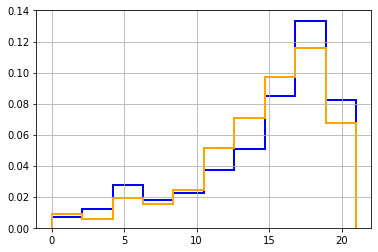

In [ ]:
#histograms

df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'black']['hate_speech_sum'].hist(density=True, histtype='step', color='blue', lw=2)




df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'white']['hate_speech_sum'].hist(density=True, histtype='step', color='orange', lw=2);


In [ ]:
#compare min white hate speech sum to max black hate speech sum...is this the best comparison?
#let's look at spread here

In [ ]:
#for race is black, max/min/mean hate speech sum
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'black'].groupby('comment_id').min()
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'black'].groupby('comment_id').max()
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'black'].groupby('comment_id').mean()

,hate_speech_sum
comment_id,
305,20.0
500,15.0
562,19.0
685,16.0
958,17.0
...,...
49542,11.0
49545,15.0
49599,19.0


In [ ]:
#for race is white, max/min/mean hate speech sum

df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'white'].groupby('comment_id').min()
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'white'].groupby('comment_id').max()
df_at_least_black_white_higher[df_at_least_black_white_higher['label_race'] == 'white'].groupby('comment_id').mean()

,hate_speech_sum
comment_id,
305,12.666667
500,12.333333
685,11.000000
958,7.000000
1118,15.000000
...,...
49466,16.000000
49542,5.333333
49545,12.000000


In [ ]:
#looking at spread, first by putting both into same df for t-testmaybe?

#hate speech sum mean for white labelers looking at black data where black labelers gave bigger difference..so maybe do this for the whoel thing



In [ ]:
#this is a df that filters to make sure black labelers are assigned to each comment at least 1 - maybe should go before the work above
df_black_white_higher[df_black_white_higher['comment_id'].isin(list_black_comments)]

,comment_id,hate_speech_sum,predict_text,label_race
0,47777,0.0,"Yes indeed. She sort of reminds me of the elder lady that played the part in the movie ""Titanic"" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!",white
234,7856,19.0,Black People are not human. Remember we considered them 3/5th human. They have one of the lowest IQ's out of any race collectivity. They're disgusting physically and extremely violate.,white
274,17467,12.0,Keep blowing brown people cummie,white
290,1543,17.0,"God you're so dumb. Everyone knows there was a voodoo spell that kept Black people trapped in Africa while white people travelled around the world. That's why they had slaves, they actually SAVED Black people from the voodoo spell that kept them trapped. Slavers were *heroes*! Read a book!",white
331,305,4.0,But how can you kill black teenagers without guns?,white
...,...,...,...,...
122416,20043,13.0,"im ,i hate black people and minorities",white
122420,20037,16.0,A black person Acting scared of harmless Animals Just because..... What's new Dramatics are their specialty,white
122423,20032,19.0,shut the fuck up you dumb black [SLUR] bitch,white
122424,20037,17.0,A black person Acting scared of harmless Animals Just because..... What's new Dramatics are their specialty,white


In [ ]:
# for comment in df_black_white_higher['comment_id']:



In [ ]:
#filter the df so it has to have BOTH white and black labelers



#find the dataframe with the biggest difference in the hate speech sum here

In [ ]:
#biggest difference between comments where comment is about black people

In [ ]:
#sum of hate speech sum that black and white labelers gave
df_black_white.groupby(['comment_id', 'label_race'])['hate_speech_sum'].sum()

comment_id  label_race
23          black         20.0
            white         38.0
26          black          5.0
            white         17.0
29          black         13.0
                          ... 
50061       white         13.0
50062       black         15.0
            white          6.0
50066       black         12.0
            white         58.0
Name: hate_speech_sum, Length: 12876, dtype: float64

In [ ]:
data_multi.groupby(['comment_id', 'label_race']).sum()

sentiment  respect  ...  hypothesis  hate_speech_sum
comment_id label_race                      ...                             
1          latino            3.0      3.0  ...    0.033300             13.0
           white            12.0     11.0  ...    0.099899             44.0
2          asian             3.0      3.0  ...   -0.199000              9.0
           white             7.0      7.0  ...   -0.397999             29.0
3          white             7.0      9.0  ...   -2.419528             32.0
...                          ...      ...  ...         ...              ...
50066      white            12.0     12.0  ...    0.652432             58.0
50067      white             4.0      3.0  ...   -0.021373             15.0
50068      white             1.0      1.0  ...   -2.461033              4.0
50069      white             4.0      4.0  ...   -0.136107             15.0
50070      white            12.0     12.0  ...    1.660528             55.0

[58644 rows x 118 columns]

In [ ]:
data_multi[data_multi['comment_id'] == 20007].groupby('label_race')['hate_speech_sum'].mean()

#looking at the comments and finding the biggest discrepancies between white raters and black raters
#get hate speech sum grouped by label race adn comment id and finding where is the biggest difference happenign
#when is the biggest difference between white raters and black labelers?

#for which comments
#hate speech sum for race -- do it by comment by comment basis 
#maybe on another comment the difference between black and white the mean diff is higher 

label_race
american indian alaska native       18.700000
asian                               18.714286
black                               18.569231
latino                              18.727273
middle eastern                      20.000000
native hawaiian pacific islander    19.333333
other race                          19.000000
unknown                             16.000000
white                               18.500852
Name: hate_speech_sum, dtype: float64

In [ ]:
data_multi.groupby('label_race')['hate_speech_sum'].mean()
#this is just an average across all of the comments

label_race
american indian alaska native       11.354704
asian                               11.315358
black                               11.278422
latino                              11.334396
middle eastern                      11.800000
native hawaiian pacific islander    11.003472
other race                          11.305463
unknown                             11.824561
white                               11.445089
Name: hate_speech_sum, dtype: float64

In [ ]:
#find comments who are targeting based off of race and racial group
#split white vs non white
#raters who are black and white and compare across all of them 

#it may be worthwhile to look at the text of the individual comments themselves

In [ ]:
#all comments targeting black folks

data_multi['target_black'].value_counts(dropna=False)


#"target_race_1\",  # Black or African American\n",
#   "    \"target_race_2\",  # Hispanic or Latino\n",
#  "    \"target_race_3\",  # Asian\n",
# "    \"target_race_8\",  # Middle Eastern\n",
#    "    \"target_race_4\",  # Native American\n",
#   "    \"target_race_5\",  # Pacific Islander\n",
#  "    \"target_race_6\",  # White\n",
#   "    \"target_race_7\",  # Other race\n",
#  "    \"target_race_7_text\",  # If other, which?\n",

NaN    112657
1.0     22899
Name: target_black, dtype: int64

In [ ]:
data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_black'] == 1)].shape

(2292, 137)

In [ ]:
data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_white'] == 1)].shape

(18545, 137)

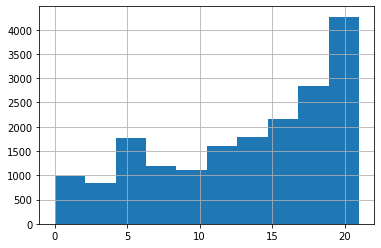

In [ ]:
#get hate speech score column for each one

data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_white'] == 1)]['hate_speech_sum'].hist()

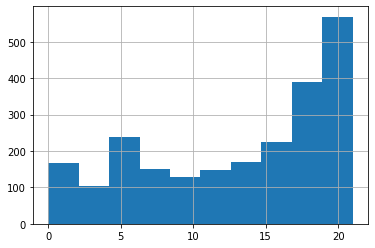

In [ ]:
data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_black'] == 1)]['hate_speech_sum'].hist()

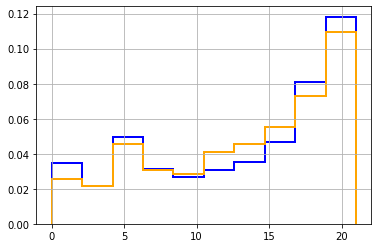

In [ ]:
data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_black'] == 1)]['hate_speech_sum'].hist(density=True, histtype='step', color='blue', lw=2)
data_multi[(data_multi['target_black'] ==1) & (data_multi['demo_white'] == 1)]['hate_speech_sum'].hist(density=True, histtype='step', color='orange', lw=2)

#in the middle region there's less higher scores for the orange one 

#closer to 20 the blue one (black) has higher density and that mass is coming from the middle region where there's higher for white
#white histogram has more density in the middle than on the extremes

#look at the text for the scores in the extremes
#good examples that are representative for each of these regions

In [ ]:
#dictionary of lists where dictionary lists are labeler ids 

#i think i'm going to have to do a for loop here
#where i get the labeler id as key
#and the comment_id as value (in list format bc there are multiple)

#example of what i'm looking for: 
# {1: {'comment_id': [20007, 20019, 20029, 20034, 20055]}}
# {1141: {'comment_id': [20018, 20032, 20053, 20057, 20066]}}

In [ ]:
# for i in data_multi_labeler2.index:
#   print(i)

In [ ]:
# data_multi_labeler2.groupby(level=0).apply(lambda data_multi_labeler2: data_multi_labeler2.xs(data_multi_labeler2.name).to_dict()).to_dict()

In [ ]:
data_multi_labeler2.reset_index(inplace=True)
data_multi_labeler2 = data_multi_labeler2.rename(columns = {'labeler_id':'labeler_id', 'comment_id': 'comment_id'})

In [ ]:
data_multi_labeler2.groupby(by=['comment_id']).count()['labeler_id']

comment_id
20001    273
20002    287
20003    282
20004    257
20005    217
        ... 
20066    267
20067    256
20068    279
20069    286
20070    206
Name: labeler_id, Length: 70, dtype: int64

In [ ]:
#sanity check

#this is the length of the whole df

len(data_multi)

135556

In [ ]:
#turning the unique comment_ids into a list 
unique_comment_ids = list(np.unique(data_multi['comment_id']))

In [ ]:
len(pd.unique(data_multi['comment_id']))
#theres 39,565 unique comments
#is there any reason to think that some comment ids may be different in number but not content?


39565

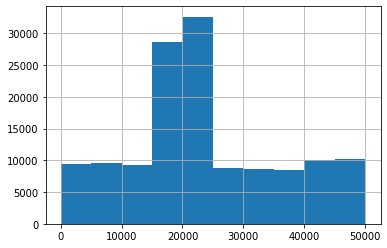

In [ ]:
#this is a histogram of the distribution of comment_id
data_multi['comment_id'].hist()

In [ ]:
#calculate average label score given by labelers who are the same race as the target


In [ ]:
#for each batch of a comment (so each row) what is the distribution of 
#rater racial background?



In [ ]:
#in which instances does the rater identity match the target identity?
#what is the distribution there?

In [ ]:
#is it typical for a comment ot be rated by particular group diverse gropu ppl?

#the data might not be dense enough to look at racial groups 
#might have to do white vs non white
#but knowing the answer: How many different racial groups are represented?

#what is the distribution of annotators rating comments? so comment 
#might be rated by 3 different racial groups in terms of the comment
#another might be just one group (all white)
#so if the mode is 1 there's only so much we can do 

## **Gender**



In [ ]:
data_multi.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_identities_1', 'target_identities_2',
       'target_identities_3', 'target_identities_4',
       'target_identities_5', 'target_identities_6',
       'target_identities_7', 'target_identities_9', 'target_race_1',
       'target_race_2', 'target_race_3', 'target_race_8', 'target_race_4',
       'target_race_5', 'target_race_6', 'target_race_7',
       'target_race_7_text', 'target_religion_1', 'target_religion_2',
       'target_religion_4', 'target_religion_5', 'target_religion_8',
       'target_religion_9', 'target_religion_10', 'target_religion_6',
       'target_religion_6_te

In [ ]:
data_multi['target_gender_7'].value_counts(dropna=False)

NaN    130853
1.0      4703
Name: target_gender_7, dtype: int64

In [ ]:
data_multi.rename(columns={'target_identities_1': 'target_race', 
                                 'target_identities_2': 'target_id_religion',
                                 'target_identities_3': 'target_id_national_origin',
                                 'target_identities_4': 'target_id_gender',
                                 'target_identities_5': 'target_id_sexual_orientation',
                                 'target_identities_6': 'target_id_age',
                                 'target_identities_7': 'target_id_disability',
                                 'target_identities_9': 'target_id_unsure',
                                 'target_race_1': 'target_black',
                                 'target_race_2': 'target_latino',
                                 'target_race_3': 'target_asian',
                                 'target_race_8': 'target_middle_eastern',
                                 'target_race_4': 'target_native_american',
                                 'target_race_5': 'target_pacific_islander',
                                 'target_race_6': 'target_white',
                                 'target_race_7': 'target_other_race',
                                 'target_race_7_text': 'target_other_race_text',
                                 'target_religion_1': 'target_jews',
                                 'target_religion_2': 'target_christians',
                                 'target_religion_4': 'target_buddhists',
                                 'target_religion_5': 'target_hindus',
                                 'target_religion_8': 'target_mormons',
                                 'target_religion_9': 'target_atheists',
                                 'target_religion_10': 'target_uslims',
                                 'target_religion_6': 'target_other_religion',
                                 'target_religion_6_text': 'target_other_religion_text',
                                 'target_citizen_5': 'target_country',
                                 'target_citizen_1': 'target_immigrant',
                                 'target_citizen_2': 'target_migrant_worker',
                                 'target_citizen_3': 'target_undocumented',
                                 'target_citizen_4': 'target_other_nationality',
                                 'target_citizen_4_text': 'target_other_nationality_text',
                                 'target_gender_1': 'target_men',
                                 'target_gender_3': 'target_women',
                                 'target_gender_2': 'target_non-binary',
                                 'target_gender_5': 'target_transgender_men',
                                 'target_gender_6': 'target_transgender_women',
                                 'target_gender_7': 'target_transgender_unspecified',
                                 'target_gender_4': 'target_other_gender',
                                 'target_gender_4_text': 'target_other_gender_text',
                                 'target_sexuality_1': 'target_bisexual',
                                 'target_sexuality_2': 'target_gay',
                                 'target_sexuality_6': 'target_lesbian',
                                 'target_sexuality_3': 'target_heterosexual',
                                 'target_sexuality_5': 'target_other_sexuality',
                                 'target_sexuality_5_text': 'target_other_sexuality_text',
                                 'target_age_1': 'target_children',
                                 'target_age_2': 'target_adolescents',
                                 'target_age_3': 'target_adults',
                                 'target_age_4': 'target_middle-aged',
                                 'target_age_5': 'target_seniors',
                                 'target_age_6': 'target_other_age',
                                 'target_age_6_text': 'target_other_age_text',
                                 'target_disability_1': 'target_physical_disability',
                                 'target_disability_2': 'target_cognitive_disability', 
                                 'target_disability_3': 'target_mental_health',
                                 'target_disability_4': 'target_visually_impaired',
                                 'target_disability_5': 'target_hearing_impaired',
                                 'target_disability_9': 'target_not_specific',
                                 'target_disability_6': 'target_other_disability',
                                 'target_disability_6_text': 'target_other_disability_text',
                                  'demo_gender': 'demo_gender', 
                                  'demo_gender_text_4': 'demo_gender text',
                                  'demo_trans': 'demo_trans',
                                  'demo_educ': 'demo_education', 
                                  'demo_race_ethnicie_1': 'demo_american_indian_alaska native',
                                  'demo_race_ethnicitie_2': 'demo_asian',
                                  'demo_race_ethnicitie_3': 'demo_alack',
                                  'demo_race_ethnicitie_4': 'demo_latino',
                                  'demo_race_ethnicitie_5': 'demo_native_hawaiian_pacific_islander',
                                  'demo_race_ethnicitie_8': 'demo_middle_eastern',
                                  'demo_race_ethnicitie_6': 'demo_white',
                                  'demo_race_ethnicitie_7': 'demo_other race',
                                  'demo_race_ethnicitie_7_text': 'demo_other_text',
                                  'demo_age': 'demo_age',
                                  'demo_income': 'demo_income',
                                  'demo_religion_1': 'demo_atheist',
                                  'demo_religion_2': 'demo_buddhist',
                                  'demo_religion_11': 'demo_chrisitan', 
                                  'demo_religion_4': 'demo_hindu',
                                  'demo_religion_5': 'demo_jewish',
                                  'demo_religion_7': 'demo_mormon',
                                  'demo_religion_8': 'demo_muslim',
                                  'demo_religion_9': 'demo_nothing_particular',
                                  'demo_religion_10': 'demo_other_religion',
                                  'demo_religion_10_text': 'demo_other_religion_text',
                                  'demo_sexual_orien_1': 'demo_straight',
                                  'demo_sexual_orien_2': 'demo_gay lesbian',
                                  'demo_sexual_orien_3': 'demo_bisexual', 
                                  'demo_sexual_orien_4': 'demo_other_sexualdemo_orientation',
                                  'demo_sexual_orien_5': 'demo_prefer_not_to_say',
                                  'demo_sexual_orien_4_text': 'demo_other_sexual_orientation_text'}, inplace=True)

In [ ]:
data_multi['demo_gender'].value_counts(dropna=False)

1.0    76370
2.0    57582
3.0      985
5.0      500
4.0      119
Name: demo_gender, dtype: int64

In [ ]:
data_multi['demo_trans'].value_counts(dropna=False)

2.0    133715
1.0      1183
4.0       658
Name: demo_trans, dtype: int64

In [ ]:
# data_multi.columns.values
#demo_gender = 1 = female
#demo_gender = 2 = male
#demo_gender = 3 = non-binary
#demo_gender = 5 = prefer not to say
#demo_gender = 4 = prefer to self describe (other)

#demo_trans = 1 = trans
#demo_trans = 2 = cis
#demo_trans = 4 = prefer not to say / other

# 'target_gender_1': 'target_men',
# 'target_gender_3': 'target_women',
# 'target_gender_2': 'target_non-binary',
# 'target_gender_5': 'target_transgender_men',
# 'target_gender_6': 'target_transgender_women',
# 'target_gender_7': 'target_transgender_unspecified',
# 'target_gender_4': 'target_other_gender',



In [ ]:
data_multi.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech', 'comment_id', 'platform', 'uid', 'predict_text',
       'measure', 'std_err', 'num_ratings', 'weight', 'has_targets',
       'target_identity_count', 'labeler_id', 'rater_measure',
       'rater_infitms', 'rater_outfitms', 'infitms', 'outfitms',
       'target_race', 'target_id_religion', 'target_id_national_origin',
       'target_id_gender', 'target_id_sexual_orientation',
       'target_id_age', 'target_id_disability', 'target_id_unsure',
       'target_black', 'target_latino', 'target_asian',
       'target_middle_eastern', 'target_native_american',
       'target_pacific_islander', 'target_white', 'target_other_race',
       'target_other_race_text', 'target_jews', 'target_christians',
       'target_buddhists', 'target_hindus', 'target_mormons',
       'target_atheists', 'target_uslims', 'target_other_religion',
       'target_oth

In [ ]:
#apply to new column target_gender

def target_gender(row):
  if row['target_men'] == 1:
    return 'cis man'
  if row['target_women'] == 1:
    return 'cis woman'
  if row['target_non-binary'] == 1:
    return 'non-binary'
  if row['target_transgender_women'] == 1:
    return 'trans woman'
  if row['target_transgender_men'] == 1:
    return 'trans man'
  if row['target_transgender_unspecified'] == 1:
    return 'trans unspecified'
  if row['target_other_gender'] == 1:
    return 'other gender'
  
  

In [ ]:
# data_multi[data_multi['target_other_gender'] == 1]

In [ ]:
data_multi['target_gender']= data_multi.apply(target_gender, axis= 1)

In [ ]:
#apply to new column label_gender

def demo_gender(row):
  if row['demo_gender'] == 1:
    return 'woman'
  if row['demo_gender'] == 2:
    return 'man'
  if row['demo_gender'] == 3:
    return 'non-binary'
  if row['demo_gender'] == 5:
    return 'prefer not to say'
  if row['demo_gender'] == 4:
    return 'other'

In [ ]:
data_multi['label_gender'] = data_multi.apply(demo_gender, axis=1)

In [ ]:
data_multi['label_gender'].value_counts(dropna=False)

woman                76370
man                  57582
non-binary             985
prefer not to say      500
other                  119
Name: label_gender, dtype: int64

In [ ]:
 #apply to new column label_trans
def demo_trans(row):
  if row['demo_trans'] == 1:
    return 'trans'
  if row['demo_trans'] == 2:
    return 'cis'
  if row['demo_trans'] == 4:
    return 'other'
  

In [ ]:
data_multi['label_trans'] = data_multi.apply(demo_trans, axis=1)

In [ ]:
data_multi['label_trans'].value_counts(dropna=False)

In [ ]:
# def demo_full_gender(row): #apply to new column demo_full_gender
#   if row['demo_trans'] == 1 and row['demo_gender'] == 1:
#     return 'trans woman'

#   if row['demo_trans'] == 1 and row['demo_gender'] == 2:
#     return 'trans man'

#    if row['demo_trans'] == 1 and row['demo_gender'] == 3:
#     return 'non-binary femme'

#     if row['demo_trans'] == 1 and row['demo_gender'] == 4:
#     return 'trans other'

#     if row['demo_trans'] == 1 and row['demo_gender'] == 5:
#     return 'trans prefer not to say'

#   if row['demo_trans'] == 2 and row['demo_gender'] == 1:
#     return 'cis woman'
  
#   if row['demo_trans'] == 2 and row['demo_gender'] == 2:
#     return 'cis man'

#   if row['demo_trans'] == 2 and row['demo_gender'] == 3:
#     return 'non-binary woman'

#   if row['demo_trans'] == 2 and row['demo_gender'] == 4:
#     return 'cis other'

#   if row['demo_trans'] == 2 and row['demo_gender'] == 5:
#     return 'cis prefer not to say'

#   if row['demo_trans'] == 4 and row['demo_gender'] == 1:
#     return 'woman'

#   if row['demo_trans'] == 4 and row['demo_gender'] == 2:
#     return 'man'

#   if row['demo_trans'] == 4 and row['demo_gender'] == 3:
#     'non-binary'

#   if row['demo_trans'] == 4 and row['demo_gender'] == 4:
#     return 'other'

#   if row['demo_trans'] == 4 and row['demo_gender'] == 5:
#     'other'
  

  
 


  
  


In [ ]:
data_multi[['target_gender', 'label_gender', 'label_trans']]

,target_gender,label_gender,label_trans
0,None,man,cis
1,trans woman,woman,cis
2,None,man,cis
3,None,man,cis
4,cis woman,woman,cis
...,...,...,...
135551,None,woman,cis
135552,None,woman,cis
135553,None,woman,cis
135554,None,man,cis


In [ ]:
data_multi['target_gender'].value_counts()

cis woman            24725
cis man              10029
trans unspecified     2533
trans woman           1417
non-binary            1116
other gender           353
trans man              266
Name: target_gender, dtype: int64

In [ ]:
trans_options = ['trans unspecified', 'trans woman', 'non-binary', 'other gender']

cis_options = ['cis woman', 'cis man' ]


In [ ]:
#turning mean values to array for trans

mean_hate_sum_col_trans = data_multi[(data_multi['label_trans'] == 'trans') & (data_multi['target_gender'].isin(trans_options))]['hate_speech_sum']
array_trans = mean_hate_sum_col_trans.values

print(array_trans)

[ 5.  0.  5. 15.  4. 16.  6. 16.  8.  0. 19.  4.  4.  3.  3. 12. 11.  1.
  1. 18. 13.  8.  0. 18.  2.  9. 13.  4.  3. 15.  5.  3.  4.  0.  2.  2.
  6. 17.  3.  4.  5.  2.  3.  2.  6.  2.  3.  3.  6. 12.  1. 10.  1.  0.
  0.  5.  4. 19. 18.  1.  0.  3.  0.  2.  5.  0. 17. 19.  0.  1. 17.  3.
  2.  0.  1.  0.  0.  3.]


In [ ]:
#turning mean values to array for cis
mean_hate_sum_col_cis = data_multi[(data_multi['label_trans'] == 'cis') & (data_multi['target_gender'].isin(cis_options))]['hate_speech_sum']
array_cis = mean_hate_sum_col_cis.values



print(array_cis)


[19. 14. 20. ...  0.  1.  0.]


In [ ]:
#t-test gender
from scipy import stats

stats.ttest_ind(array_trans, array_cis)


Ttest_indResult(statistic=-8.724516552562084, pvalue=2.791156871619951e-18)

## **Logistic Regression**